<div style="text-align:center; font-size:30px; color:blue;"><b><u>Credit Card Fraud Detection Capstone Project</u></b></div>

# Introduction:

- The Credit Card Fraud Detection project is dedicated to enhancing financial security by utilizing advanced machine learning and data analysis techniques.

- The main objective is to develop a predictive model capable of effectively differentiating between legitimate and fraudulent credit card transactions.

- By harnessing machine learning, specifically supervised learning and anomaly detection, this project tackles the evolving nature of fraud patterns, moving beyond the limitations of traditional rule-based systems.

- Key elements include data preprocessing, feature engineering, model selection, and the use of evaluation metrics.

- This project explores various machine learning algorithms, such as logistic regression, decision trees, random forests, and support vector machines, with the aim of identifying the most effective method for fraud detection.

- Ultimately, the goal is to provide a robust, efficient, and adaptive solution to protect financial transactions from the constantly changing landscape of fraudulent activities.

# Project Objectives

- The aim of this project is to utilize machine learning models to predict fraudulent credit card transactions. The process generally includes preprocessing and exploring the dataset, which may consist of features like transaction amount, location, time, and past transaction history.

- Following the division of the dataset into training and testing sets, various machine learning algorithms such as logistic regression, decision trees, random forests, and support vector machines can be applied to construct predictive models.

- These models are trained on a labeled dataset where instances of fraudulent and legitimate transactions are identified. Evaluation metrics such as precision, recall, and the F1 score are typically used to gauge the model's performance. Continuous refinement might involve tuning hyperparameters, using ensemble methods, or exploring more advanced techniques like anomaly detection.

- The ultimate objective is for the final model to accurately identify and prevent fraudulent credit card transactions by learning patterns from historical data.

# Understanding and defining fraud

Credit card fraud encompasses any deceitful action or behavior intended to acquire information without proper authorization from the account holder for financial gain. Among various methods of committing fraud, skimming is the most prevalent. Skimming involves duplicating information stored on the magnetic strip of the card. Besides skimming, other common methods include:

- Manipulation/Alteration of Genuine Cards: This technique involves tampering with authentic cards to change their information or functionalities. Fraudsters may alter the card details or encoding to facilitate unauthorized transactions.

- Creation of Counterfeit Cards: Fraudsters produce fake cards that replicate the details of legitimate cards. These counterfeit cards are often created using advanced technology to mimic the appearance and functionality of real credit cards, making it challenging to detect their fraudulent nature.

- Theft/Loss of Credit Cards: Physical theft or loss of credit cards remains a significant method of fraud. Stolen cards can be used for unauthorized transactions before the cardholder notices the loss and reports it to the issuing bank.

- Fraudulent Telemarketing: In this scheme, scammers use deceptive telemarketing techniques to trick individuals into providing their credit card information. They may pose as representatives from legitimate companies or offer fake prizes and services to lure victims into sharing their sensitive information.

These methods highlight the diverse and evolving tactics used by fraudsters to exploit credit card systems for illicit financial gain.

# Problem Statement:

The focus of this project is to employ machine learning models to predict and identify fraudulent credit card transactions.

# Business Problem Overview:

- Retention of Profitable Clients:

For many banks, maintaining relationships with highly profitable clients is crucial. However, the increasing incidence of banking fraud poses a significant threat to this goal. The financial losses incurred, along with the potential damage to the bank's reputation and customer trust, are major concerns.

- Projected Losses Due to Fraud:

The Nilson Report highlights a staggering prediction: global losses due to banking fraud could reach $30 billion by 2020. This alarming statistic underscores the urgency for banks to adopt more sophisticated fraud detection methods as digital payment methods become more widespread and fraud techniques evolve.

- Necessity of Machine Learning in Fraud Detection:

In the current landscape, machine learning-based fraud detection systems are not just a trend but a necessity. These systems enable banks to implement proactive monitoring and fraud prevention strategies. By leveraging machine learning, banks can significantly reduce the time and resources spent on manual transaction reviews, mitigate the costs associated with chargebacks and fraudulent transactions, and avoid mistakenly rejecting legitimate transactions.
By addressing these points, the project aims to provide a robust solution to the growing problem of credit card fraud, ultimately safeguarding both banks and their customers from the financial and reputational risks associated with fraudulent activities.

# About the Dataset

- The dataset is sourced from Kaggle and comprises a total of 284,807 transactions, out of which 492 are fraudulent. Given the highly imbalanced nature of the dataset, it is crucial to address this imbalance prior to model building.

- It is imperative for credit card companies to accurately detect fraudulent transactions to ensure customers are not erroneously billed for purchases they did not make.

- The dataset includes credit card transactions made by European cardholders in September 2013. It captures transactions over a span of two days, where 492 out of 284,807 transactions are fraudulent, making the positive class (fraudulent transactions) a mere 0.172% of the total.

- The dataset consists solely of numerical input variables derived from a PCA transformation. Due to confidentiality constraints, the original features and additional background information cannot be disclosed. Features V1, V2, ..., V28 represent the principal components obtained via PCA, while 'Time' and 'Amount' are the only features not transformed. The 'Time' feature indicates the seconds elapsed between each transaction and the first transaction in the dataset. The 'Amount' feature denotes the transaction amount, which can be useful for example-dependent cost-sensitive learning. The 'Class' feature is the target variable, with 1 indicating fraud and 0 indicating non-fraud.

- Given the class imbalance, it is recommended to measure accuracy using the Area Under the Precision-Recall Curve (AUPRC), as traditional accuracy metrics are not meaningful for imbalanced datasets.

# Project implementation Approach

We have created models using the algorithms listed below, then compare them to see which model performs the best. 
- Logistic Regression
- Decision Tree
- XGBoost

We haven't used SVM, RandomForest, or KNN when developing models because they were computationally demanding and require a lot of processing power, particularly for SVM and KNN. KNN algorithms compute the distance between each data point, and to get the closest neighbor, this computation is repeated for each data point. In cases where the data set is quite huge, this technique becomes highly costly computationally. 

We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the  dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 99% on the test data and F1 score 100% on train data and 81% in the test data.

Hence, `XGBoost model with Adasyn` is the best model.


In [1]:
# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## 1. Exploratory data analysis

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#observe the different feature type present in the data
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

### 1.1 Handling Missing Values

In [6]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Inference:** No missing values present in the dataframe

### 1.2 Observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

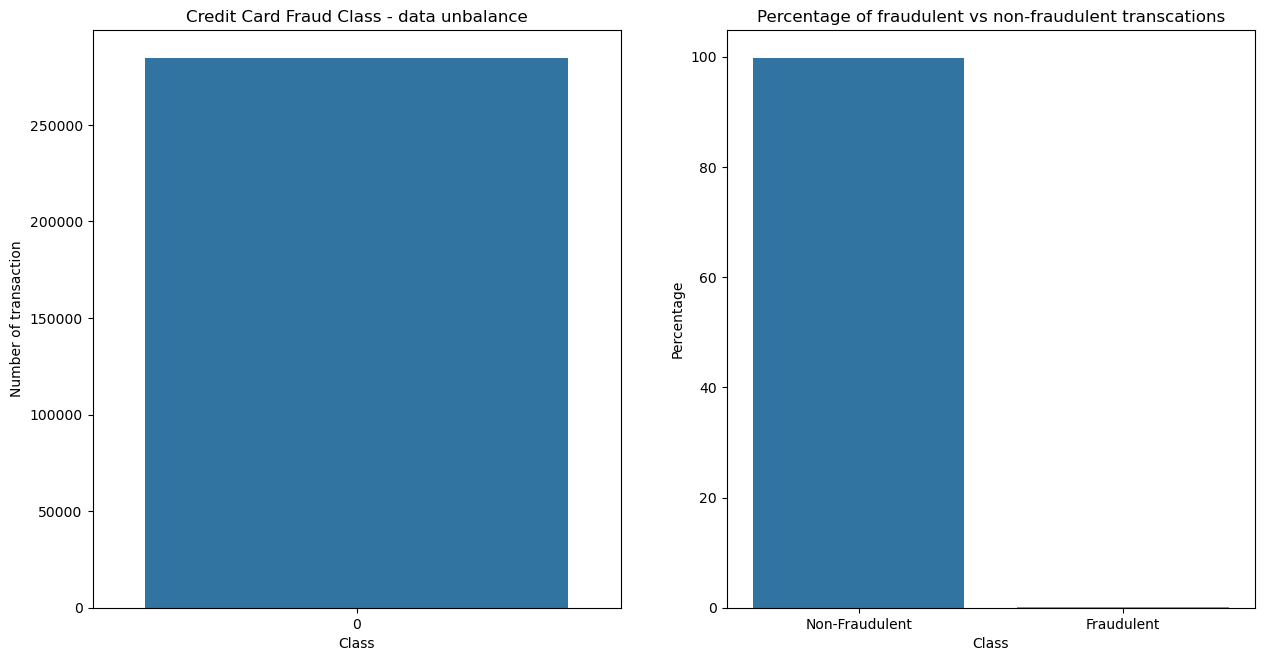

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

#### **Inference:** Above graph shows that data is imbalance, only 492 out of 284807 transactions are fraudalent.

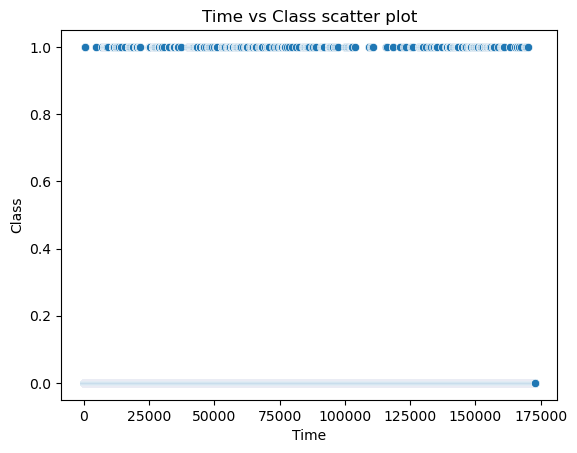

In [10]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x="Time", y="Class", data=df)
plt.title("Time vs Class scatter plot")
plt.show()

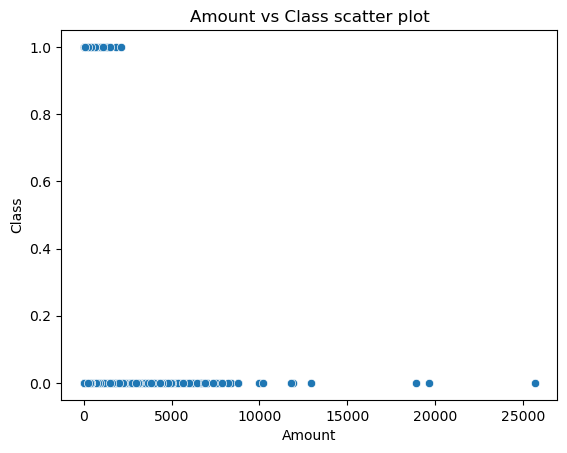

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x="Amount", y="Class", data=df)
plt.title("Amount vs Class scatter plot")
plt.show()

#### **Inference:** Low Amount transactions are more likely to fraudalent than high amount transaction.

Dropping `Time` column as this feature is not going to help in the model building.

In [12]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

### 1.3 Plotting the distributions of all the featuers

<Figure size 640x480 with 0 Axes>

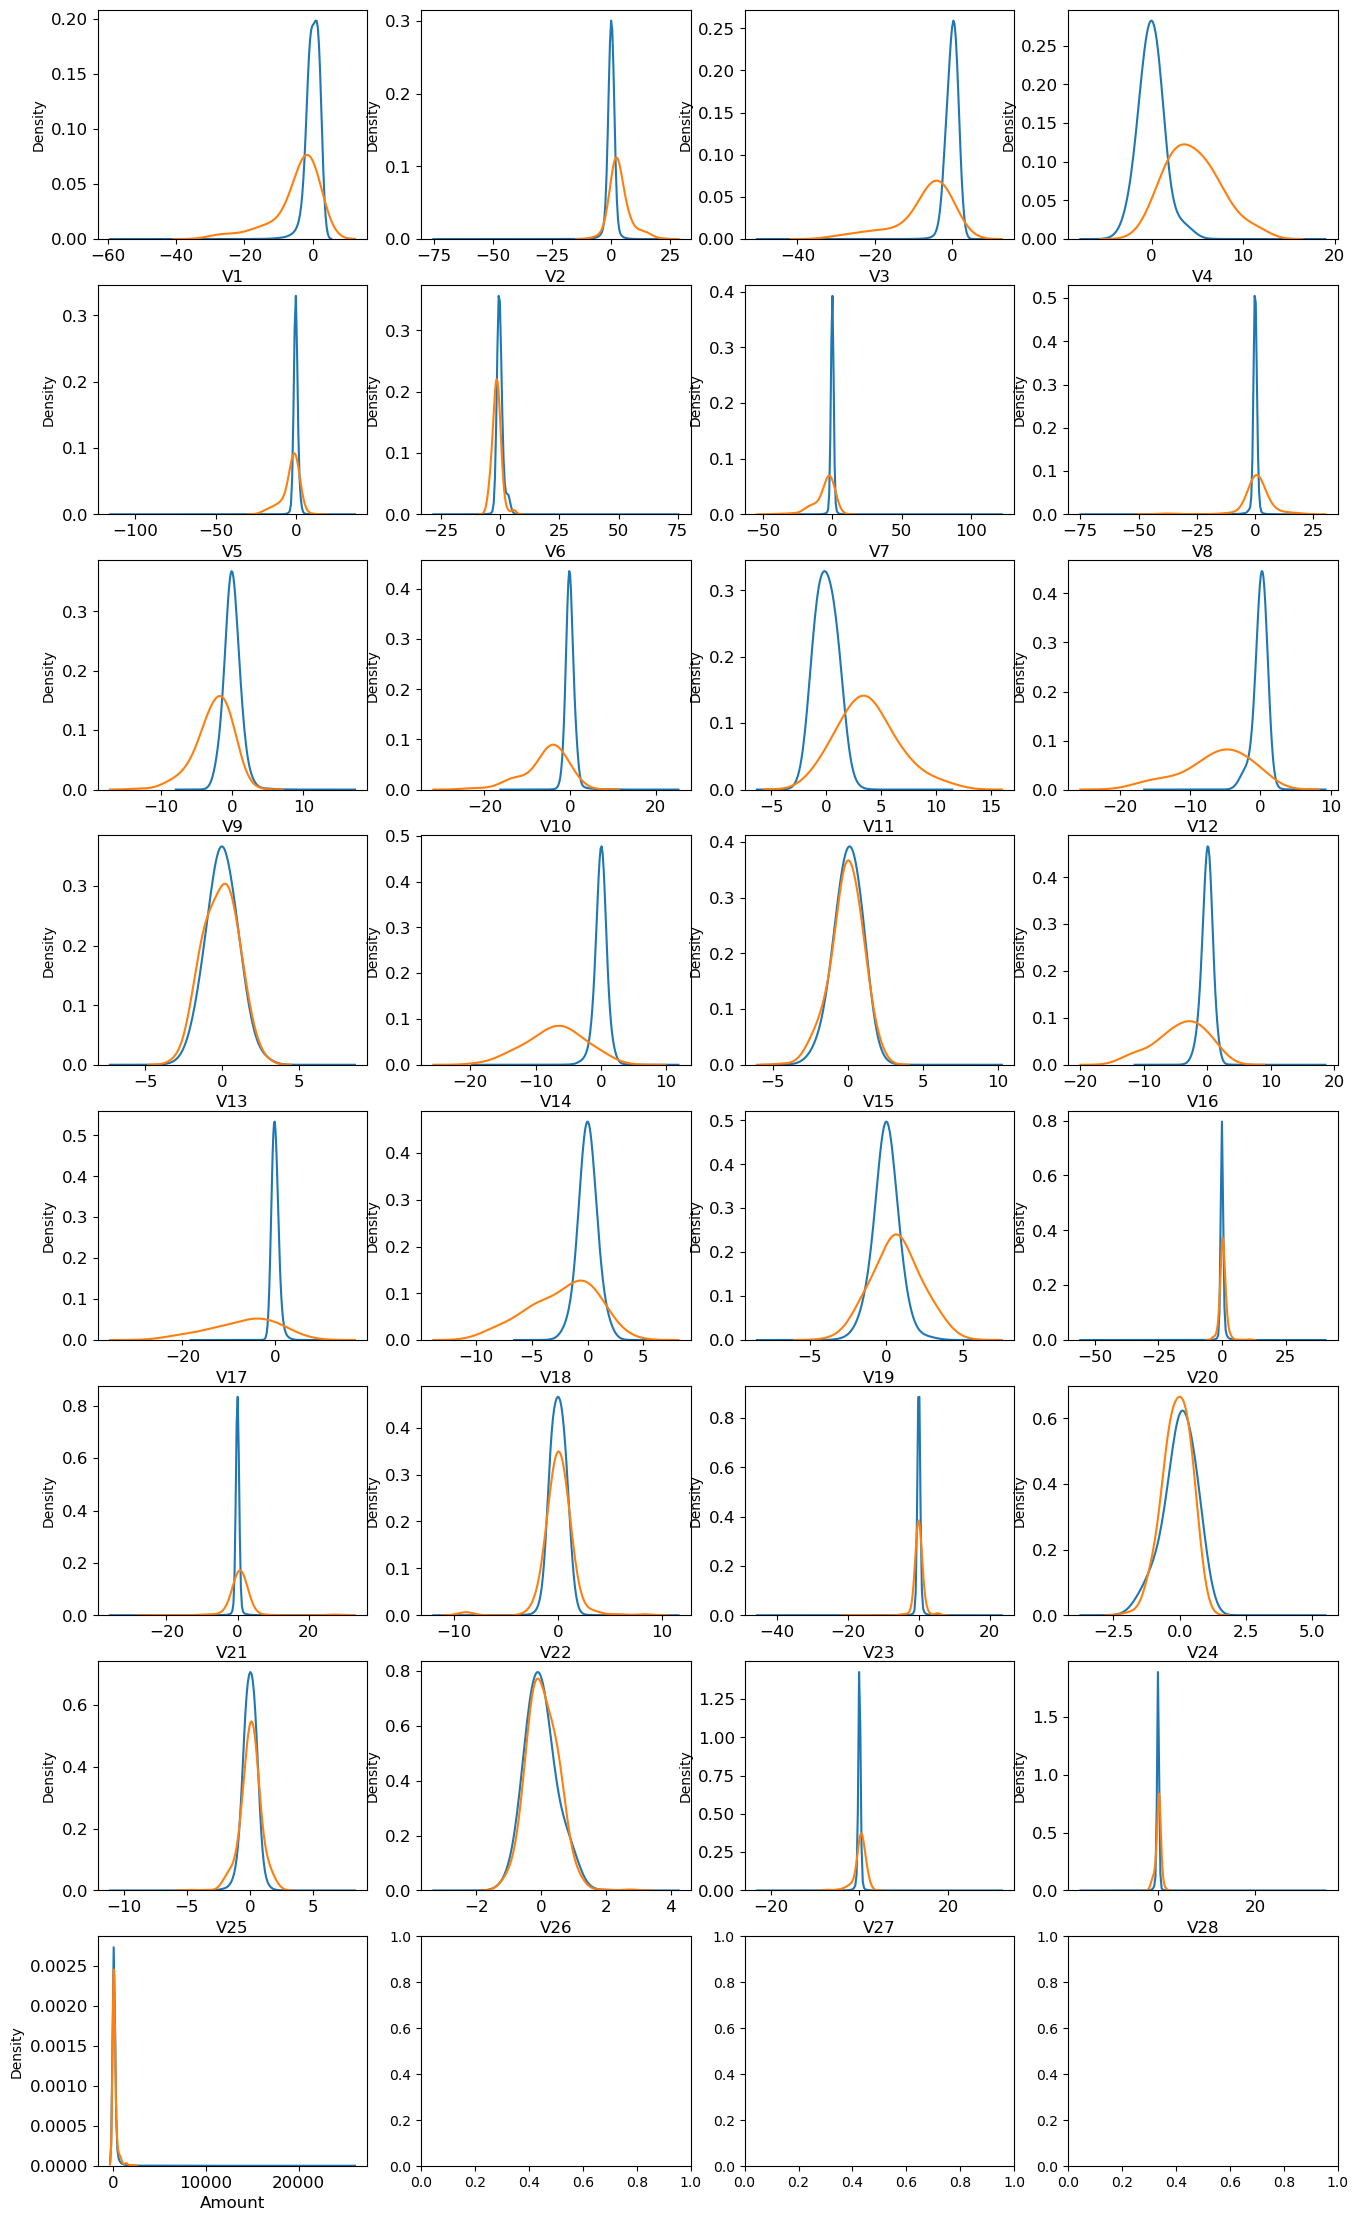

In [13]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#### **Inference:** Most of the features are overlapping for both fraudalent & Non0fraudalent transations. 

## 2. Splitting the data into train & test data

In [14]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [15]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### 2.1 Feature Scaling using Standard Scaler

We need to scale `Amount` column.

In [17]:
scaler = StandardScaler()

X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [18]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [19]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


### 2.2 Plotting the distribution of a variable to handle skewness

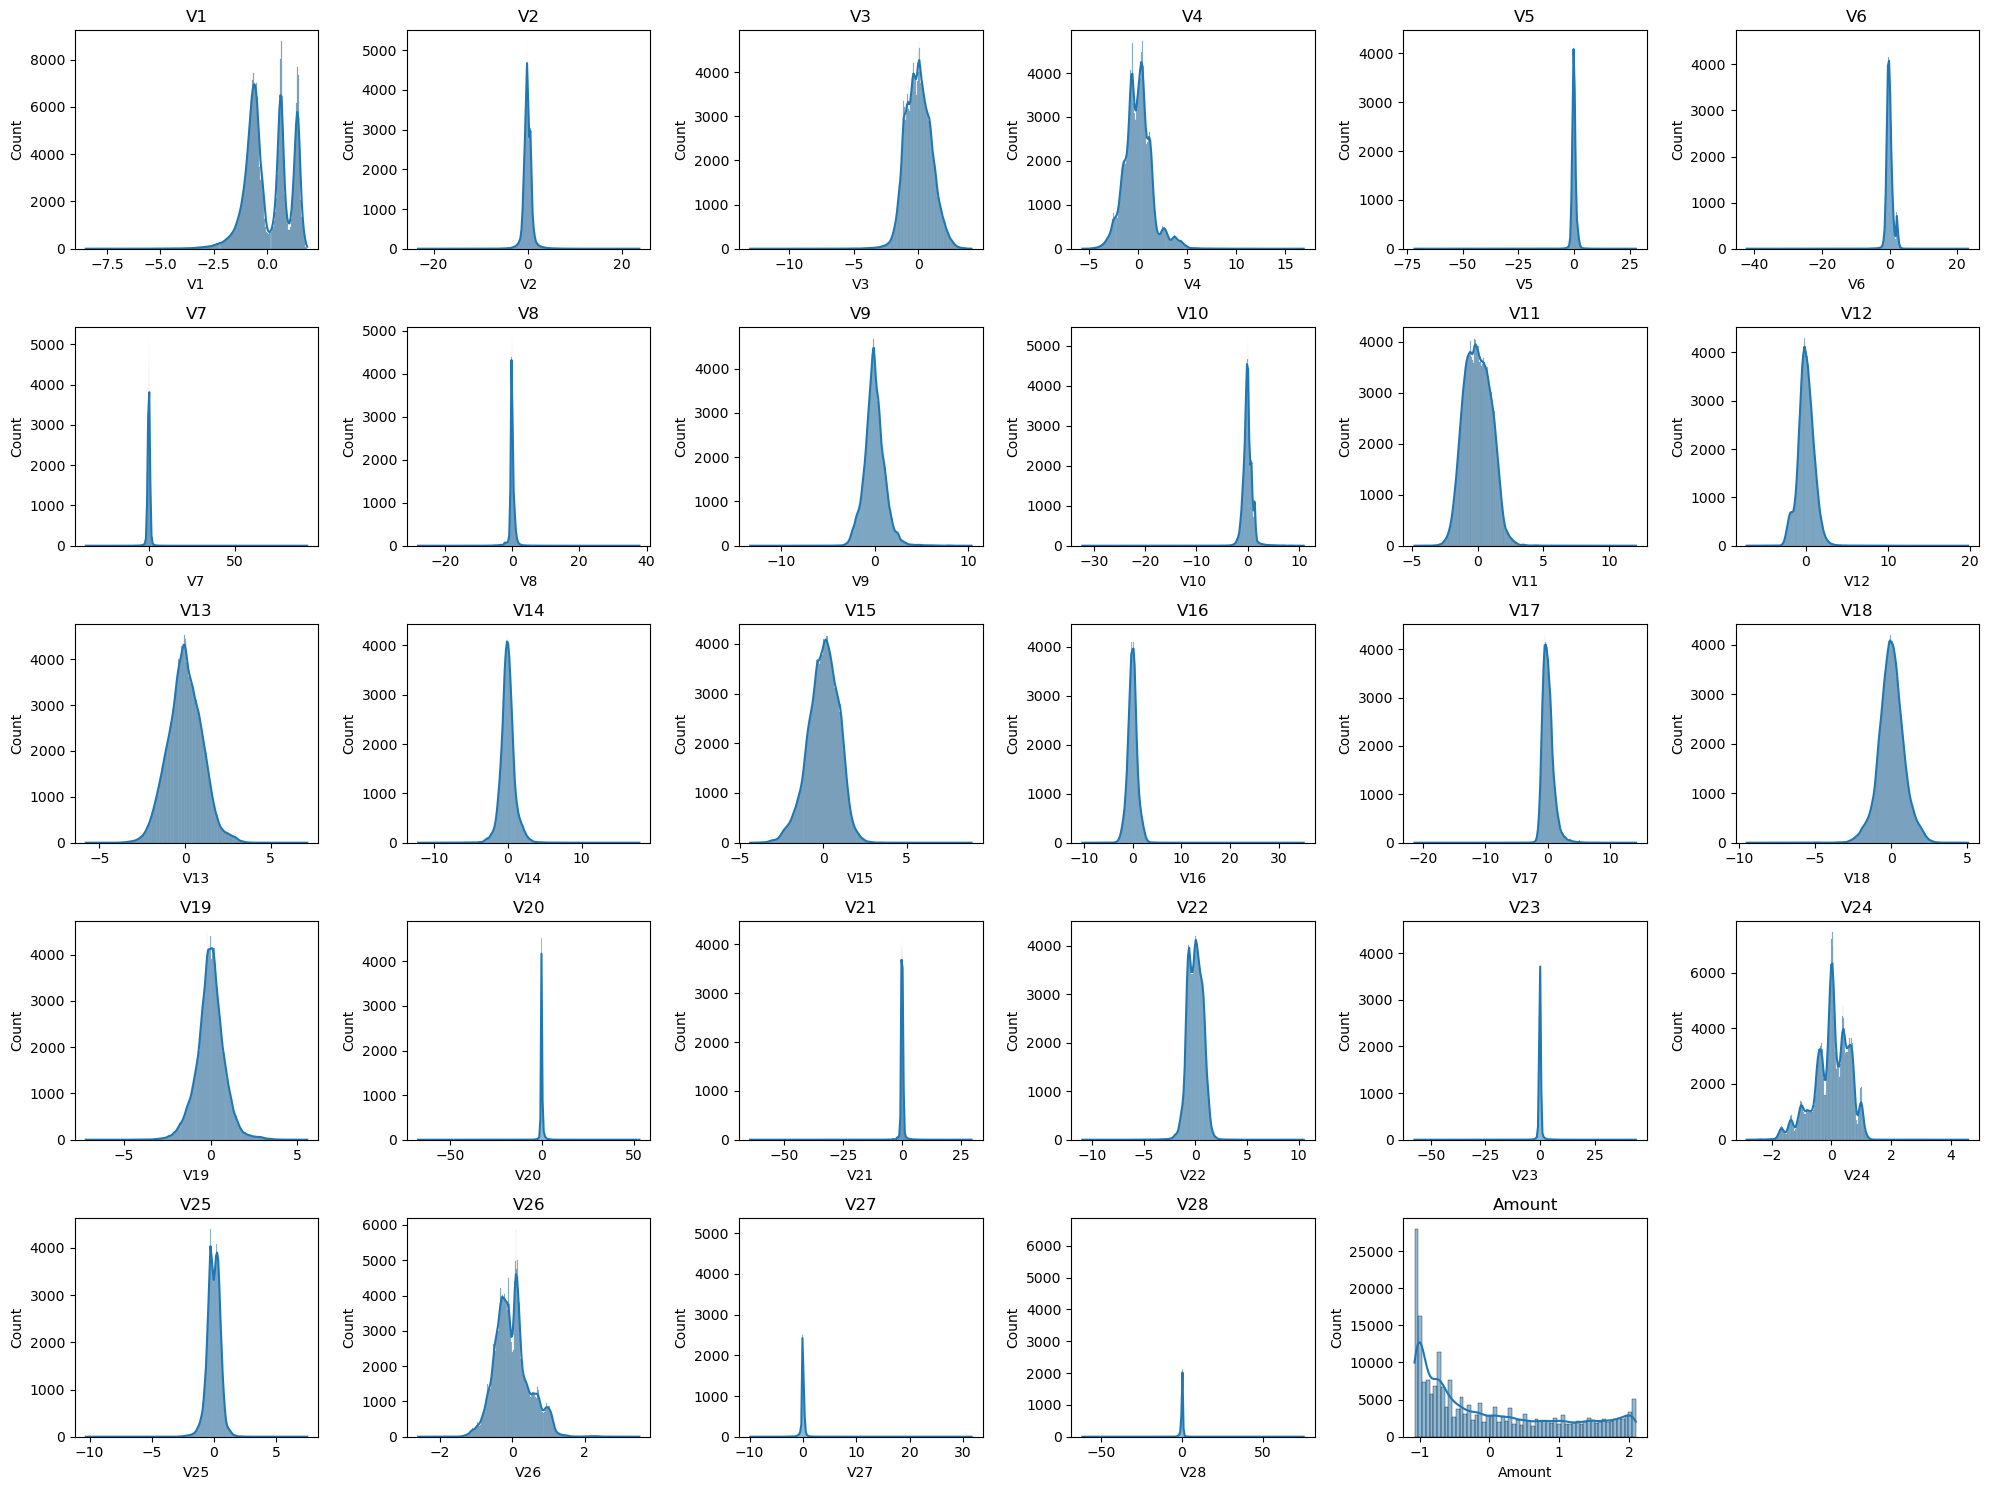

In [143]:
var = X_train.columns

plt.figure(figsize=(20,15))
for i, col in enumerate(var, 1):  
    plt.subplot(5, 6, i)
    sns.histplot(X_train[col], kde=True)  
    plt.title(col)

plt.tight_layout()  
plt.show()

#### **Inference:** Many features are skewed, if skewness is beyond -1 and 1 then we can use PowerTransform to transform the data. 

In [22]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [23]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


#### **Inferene:** There is skewness present in feature distribution.

### 2.3 PowerTransform 
- Power Transformer package present in the <b>preprocessing library provided by sklearn</b> is used to make the distribution more gaussian

In [24]:
pt = PowerTransformer(copy=False)

X_train[skewed] = pt.fit_transform(X_train[skewed])

X_test[skewed] = pt.transform(X_test[skewed])

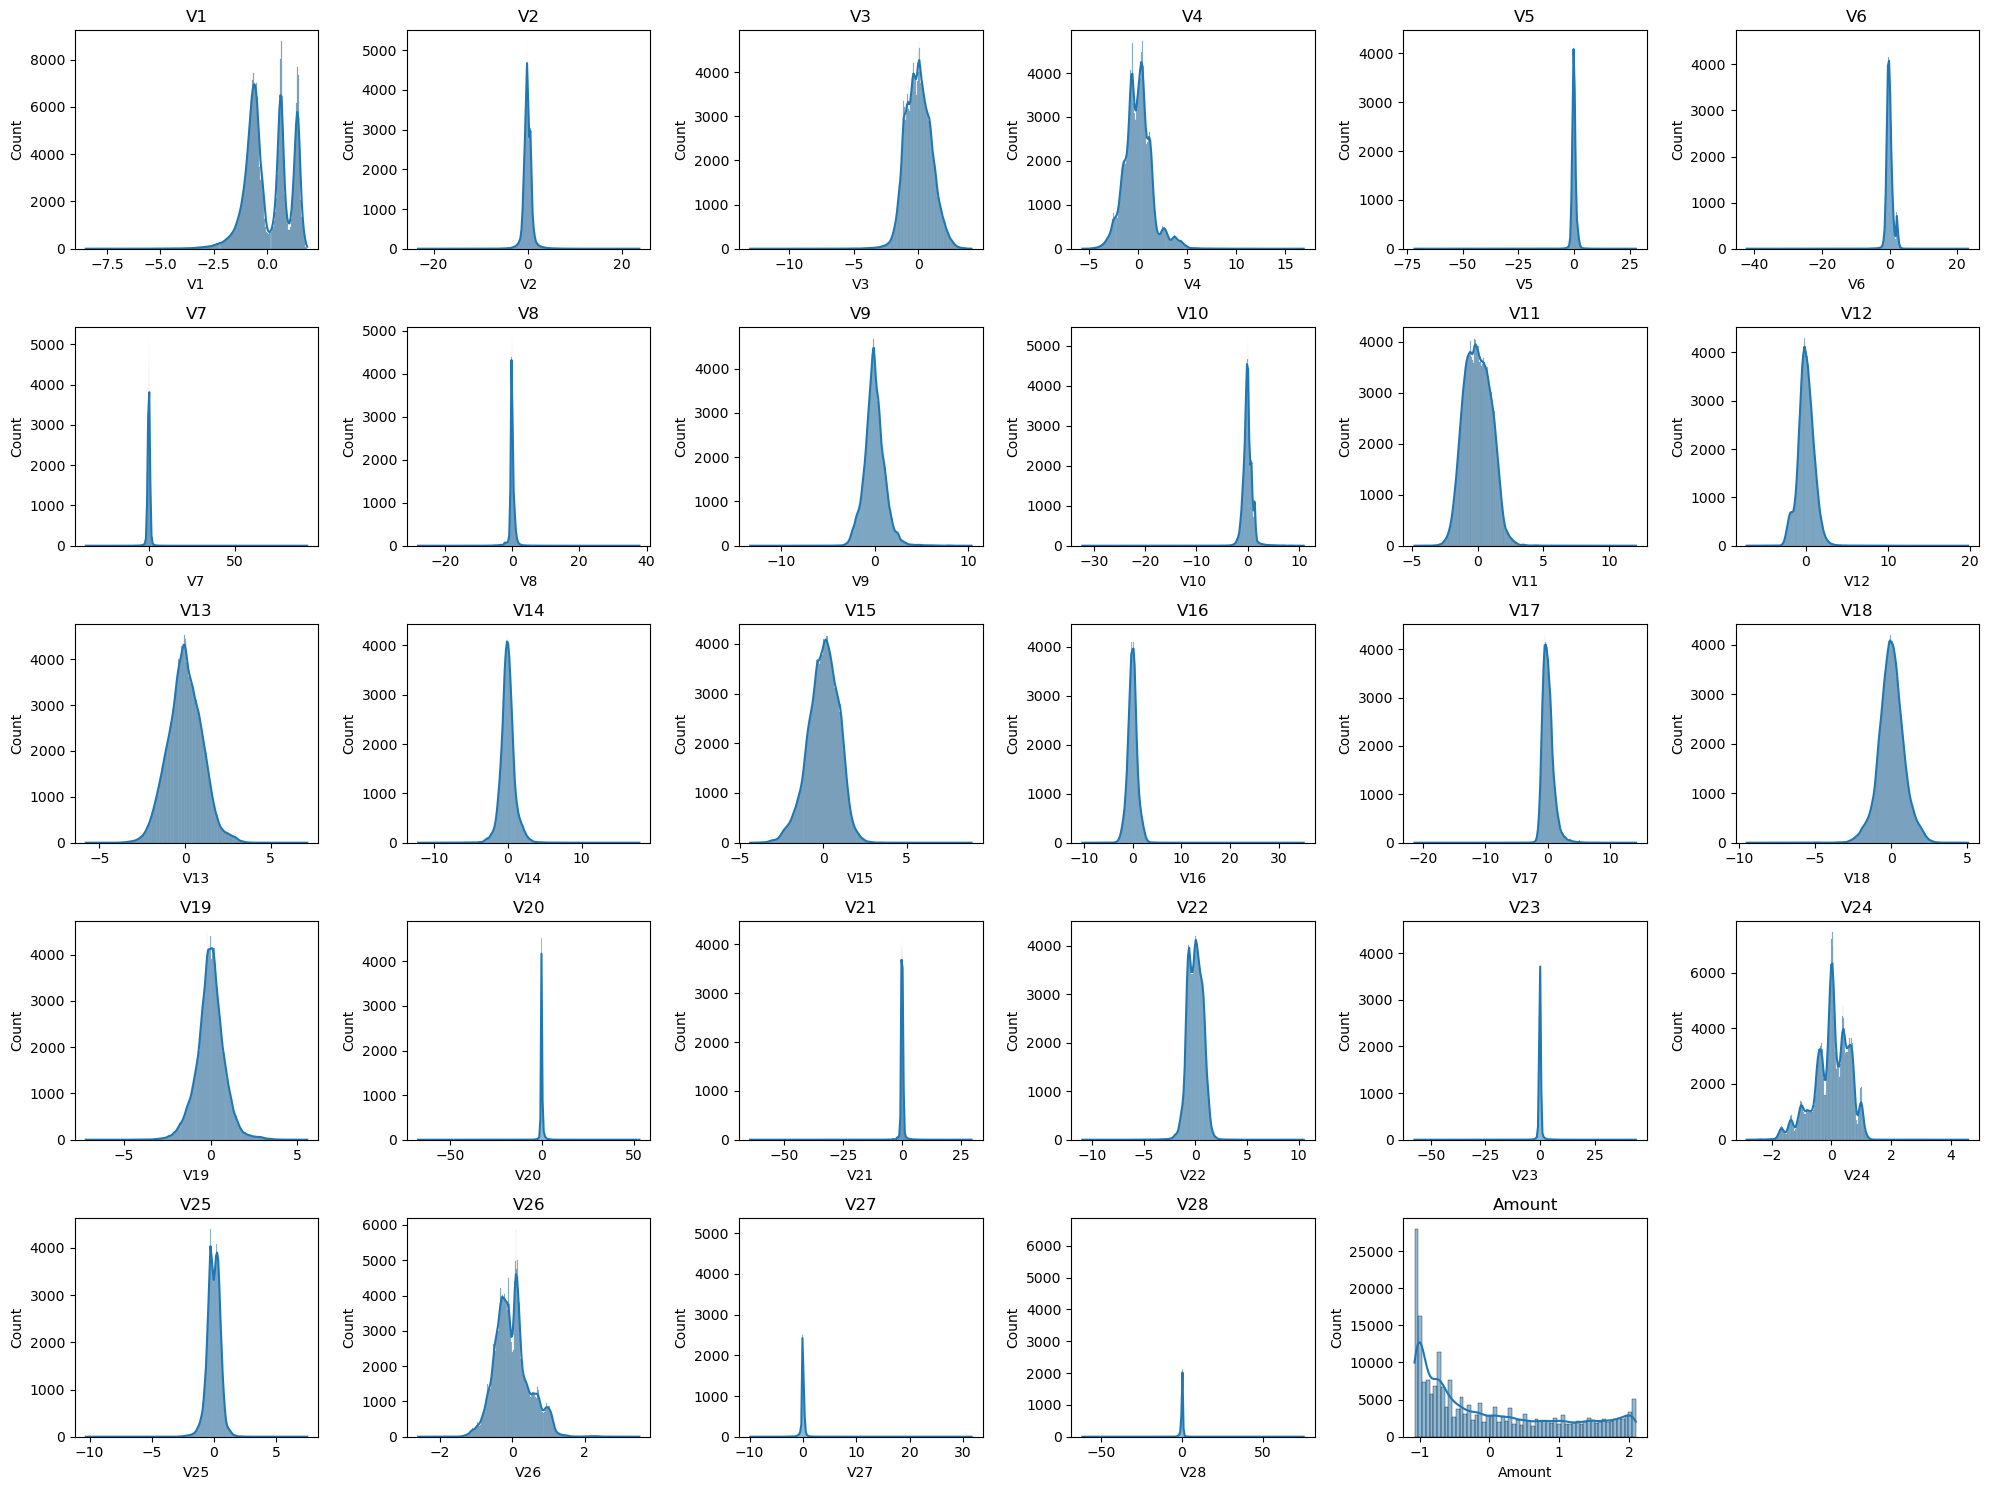

In [25]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(var, 1):  
    plt.subplot(5, 6, i)
    sns.histplot(X_train[col], kde=True)  
    plt.title(col)

plt.tight_layout()  
plt.show()

## Model Building with imbalanced data

### Metrics for Balanced Data
#### Employing ROC-AUC as assessment metric. We are using as accuracy won't be appropriate statistics because data is very skewed and there are very few fraudalent tranactions.

In [26]:
# Class imbalance
y_train.value_counts()/y_train.shape

0    0.998271
1    0.001729
Name: Class, dtype: float64

### 1. Logistic Regression

In [27]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)

print('Best ROC AUC score: ', model_cv.best_score_)

print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9814533001655027
Best hyperparameters:  {'C': 0.01}


In [28]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.216328,0.088591,0.045399,0.009769,0.01,{'C': 0.01},0.966660,0.987834,0.991868,0.971808,0.989097,0.981453,0.010193,1,0.987070,0.981708,0.980443,0.986561,0.980840,0.983324,0.002884
1,1.135356,0.118609,0.048602,0.009953,0.1,{'C': 0.1},0.967083,0.983684,0.990282,0.966392,0.984831,0.978454,0.009826,2,0.984806,0.978714,0.978578,0.985010,0.979556,0.981333,0.002939
2,1.180397,0.063433,0.049011,0.009715,1,{'C': 1},0.967110,0.983119,0.989944,0.965358,0.984313,0.977969,0.009870,3,0.984310,0.978077,0.978235,0.984692,0.979131,0.980889,0.002974
3,1.090406,0.024474,0.050994,0.015197,10,{'C': 10},0.967116,0.983046,0.989904,0.965231,0.984253,0.977910,0.009877,4,0.984249,0.978002,0.978198,0.984655,0.979082,0.980837,0.002977
4,1.064398,0.055137,0.045003,0.010374,100,{'C': 100},0.967117,0.983038,0.989898,0.965219,0.984247,0.977904,0.009876,5,0.984242,0.977995,0.978194,0.984652,0.979077,0.980832,0.002977
5,0.930597,0.058012,0.031202,0.006013,1000,{'C': 1000},0.967117,0.983037,0.989897,0.965218,0.984246,0.977903,0.009876,6,0.984242,0.977994,0.978194,0.984652,0.979077,0.980832,0.002977


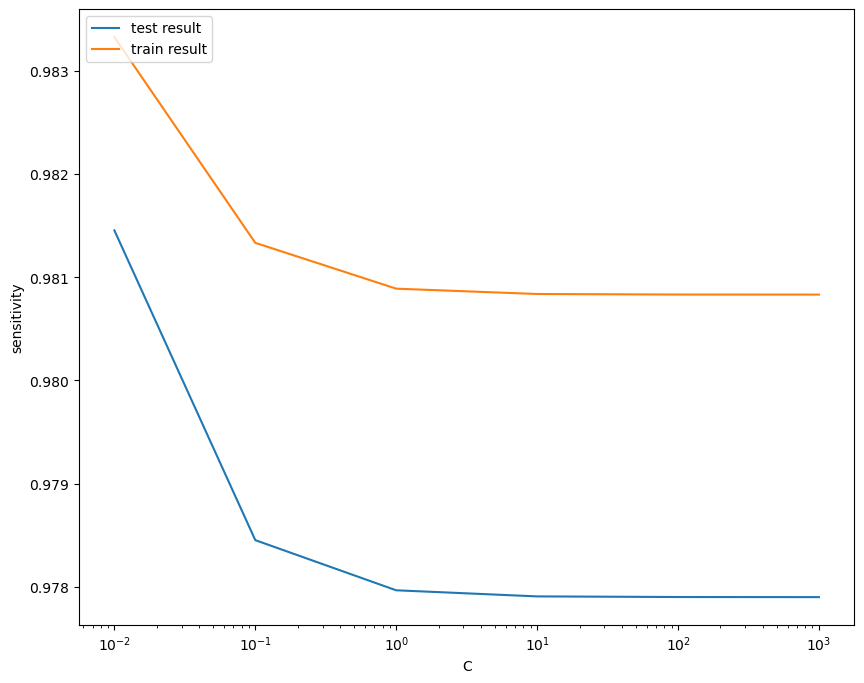

In [29]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### 1.1 Logistic Regression with optimal C

In [30]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### 1.2 Prediction and model evalution on the train set

In [31]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [32]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [33]:
display_scores(y_train, y_train_pred)

F1 Score: 73.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [34]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [35]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

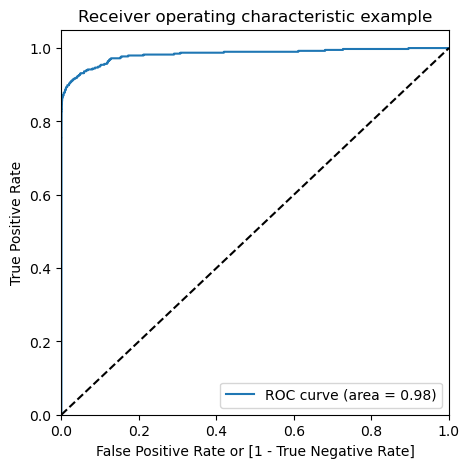

In [36]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### 1.3 Evaluating the model on the test set

In [37]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 67.9%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

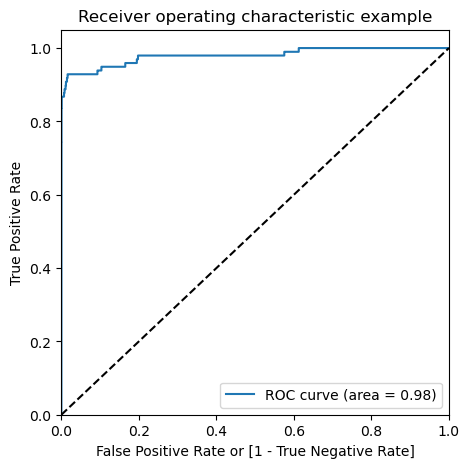

In [39]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see very good ROC on the test data set 0.98.

#### 1.4 Model Summary

- Train set
    - ROC : 98%
    - F1 Score: 73.76%
    
- Test set
    - ROC : 98%
    - F1 score: 70.3%

### 2. Decision Tree

In [40]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [41]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.391737,0.195611,0.046997,0.002452,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912643,0.919716,0.951705,0.928021,0.016994,7
1,7.378737,0.138431,0.044000,0.002943,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.905066,0.927341,0.951706,0.928038,0.019047,6
2,7.470269,0.064471,0.043666,0.003300,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,2
3,7.607330,0.144591,0.045002,0.001412,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,2
4,16.400000,0.194994,0.060671,0.005432,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934909,0.916392,0.908207,0.919836,0.011170,8
5,17.011001,0.443732,0.056666,0.004497,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.942333,0.931277,0.915738,0.929783,0.010909,5
6,16.471330,1.102170,0.043669,0.010656,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963212,0.930674,0.908152,0.934012,0.022602,1
7,14.763346,0.123397,0.029011,0.005727,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.955843,0.930633,0.908137,0.931538,0.019486,4


In [42]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9340123014632004
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### 2.1 Decision Tree with optimal hyperparameters

In [43]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### 2.2 Prediction on the train set

In [44]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



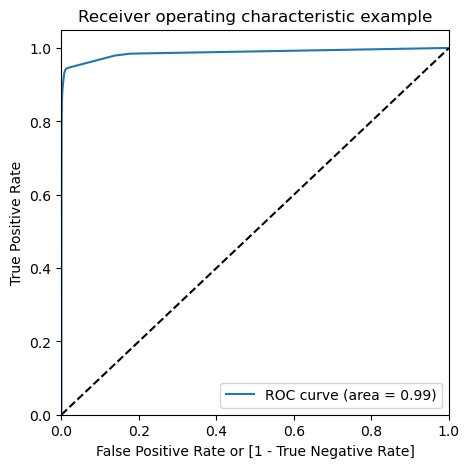

In [45]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

draw_roc(y_train, y_train_pred_proba)

#### 2.3 Evaluating the model on the test set

In [46]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



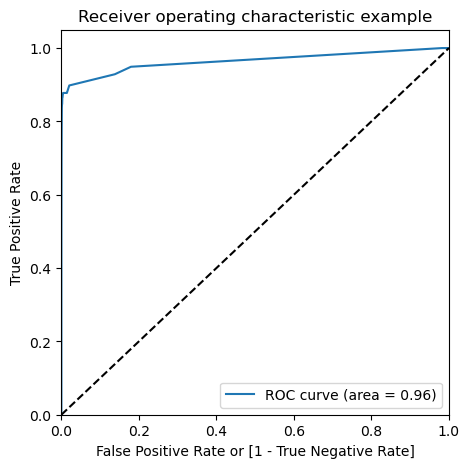

In [47]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

draw_roc(y_test, y_test_pred_proba)

#### 2.4 Model Summary

- Train set
    - ROC Score: 99%
    - F1 score : 72.33%
    
- Test set
    - ROC Score: 96%
    - F1 score : 71.88%

### 3. XGBoost

In [48]:
# creating a KFold object 
folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [49]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.092136,0.425253,0.055745,0.001670,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968831,0.960607,0.986866,0.972101,0.010967,6,0.999832,0.999843,0.999686,0.999787,0.000071
1,1.942644,0.099920,0.060669,0.006599,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.975385,0.983747,0.987352,0.982161,0.005013,2,0.999883,0.999946,0.999879,0.999902,0.000031
2,2.195202,0.043421,0.069002,0.000816,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980065,0.976040,0.988241,0.981449,0.005076,3,0.999931,0.999922,0.999836,0.999896,0.000042
3,2.653126,0.352399,0.074337,0.009108,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974193,0.962130,0.983242,0.973189,0.008648,5,0.999997,0.999979,0.999995,0.999990,0.000008
4,2.276499,0.016484,0.066001,0.000817,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.978817,0.965375,0.980272,0.974821,0.006706,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,2.260336,0.054972,0.066667,0.002356,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.984408,0.978815,0.985159,0.982794,0.002830,1,1.000000,1.000000,1.000000,1.000000,0.000000


In [50]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.982793816632015
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [51]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

#### 3.1 XGBoost model with optimal hyperparameter

In [52]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### 3.2 Model evaluation on train set

In [53]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



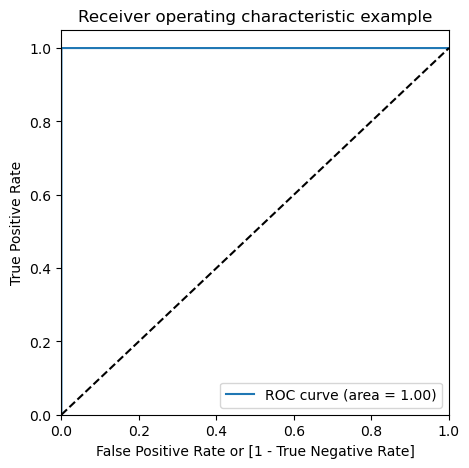

In [54]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### 3.3 Evaluating the model on the test set

In [55]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



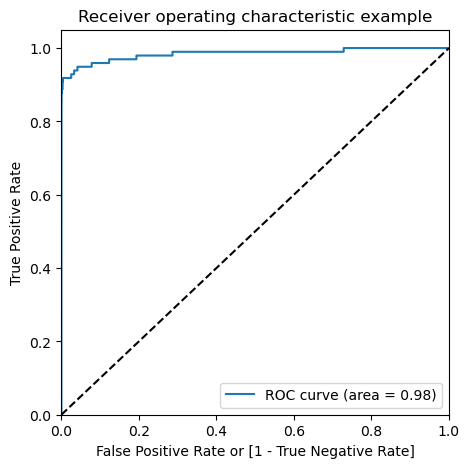

In [56]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### 3.4 Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 100.0%
- Test set
    - ROC score: 98%
    - F1 score: 88.27%

### **Inference: Out of these three models, the XGBoost model performs well on unbalanced data. With train data, the ROC-AUC score is 100%, while with test data, it is 98%.**

## Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


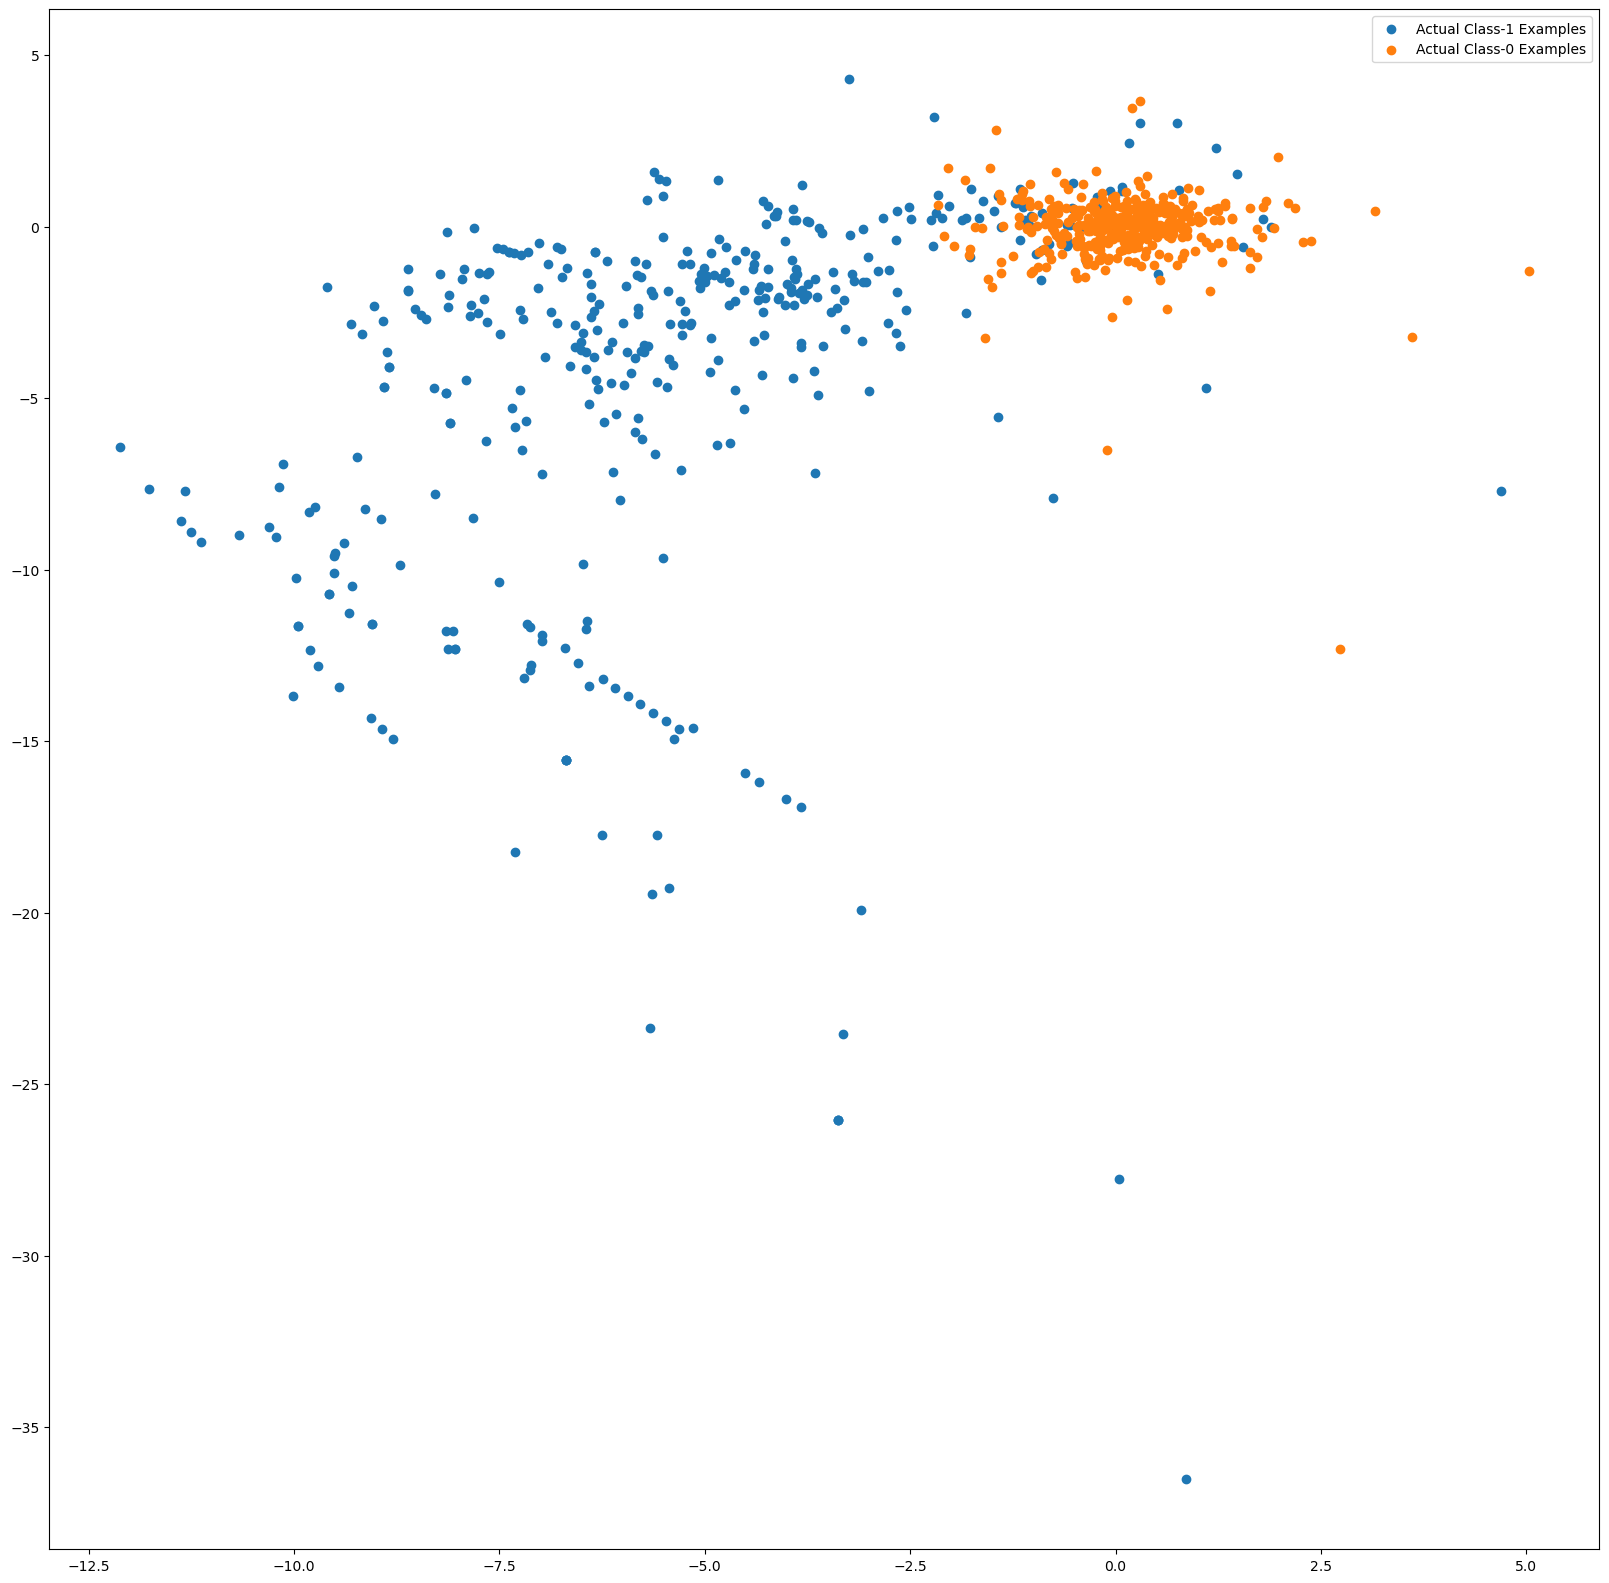

In [57]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [58]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.81609064


#### **Inference:** We can see that the threshold is 0.81, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Model building with balancing Classes

We are going to perform below over sampling approaches for handling data imbalance and we will pick the best approach based on model performance.
- Random Oversampling
- SMOTE
- ADASYN

## 1. Random Oversampling

In [59]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [60]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))

print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1.1 Logistic Regrassion with Random Oversampling

In [61]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 


model_cv.fit(X_over, y_over)

print('Best ROC AUC score: ', model_cv.best_score_)

print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9869113130913106
Best hyperparameters:  {'C': 10}


In [62]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.877434,0.084724,0.032207,0.004159,0.01,{'C': 0.01},0.986662,0.987061,0.986837,0.986527,0.986669,0.986751,0.000184,6,0.986802,0.986684,0.986673,0.986811,0.986844,0.986763,0.000070
1,0.904253,0.028030,0.028799,0.001139,0.1,{'C': 0.1},0.986804,0.987191,0.986973,0.986666,0.986833,0.986893,0.000178,5,0.986947,0.986827,0.986808,0.986942,0.986998,0.986904,0.000074
2,0.916389,0.034765,0.028776,0.000750,1,{'C': 1},0.986820,0.987208,0.986994,0.986686,0.986847,0.986911,0.000178,2,0.986962,0.986846,0.986827,0.986958,0.987011,0.986921,0.000072
3,0.945108,0.060844,0.028635,0.000509,10,{'C': 10},0.986824,0.987209,0.986996,0.986683,0.986845,0.986911,0.000179,1,0.986965,0.986848,0.986828,0.986956,0.987012,0.986922,0.000071
4,0.904395,0.024746,0.029826,0.000734,100,{'C': 100},0.986822,0.987209,0.986996,0.986684,0.986843,0.986911,0.000179,4,0.986963,0.986848,0.986828,0.986956,0.987012,0.986921,0.000071
5,0.926189,0.044503,0.029600,0.000501,1000,{'C': 1000},0.986822,0.987209,0.986996,0.986684,0.986843,0.986911,0.000179,3,0.986963,0.986848,0.986828,0.986956,0.987012,0.986921,0.000071


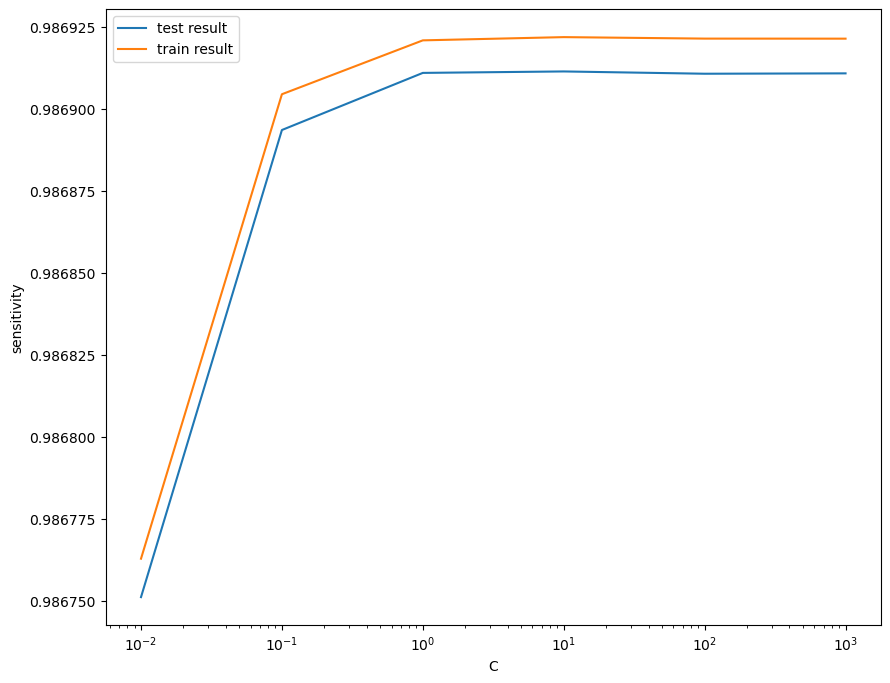

In [63]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### 1.1.1 Logistic Regression with hyperparameter tuning

In [64]:
model_cv.best_params_

{'C': 10}

In [65]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

logreg_over_model = logreg_over.fit(X_over, y_over)

#### 1.1.2 Evaluating the model on train data

In [66]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [67]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.31%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



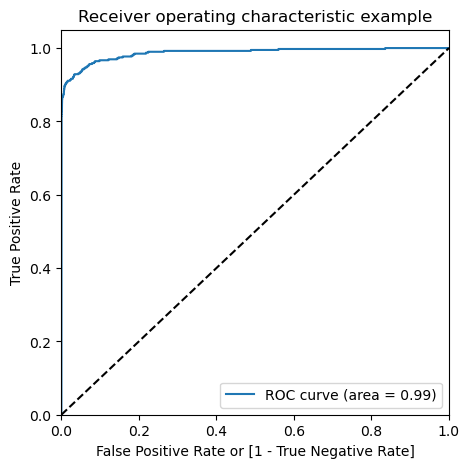

In [68]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]

draw_roc(y_over, y_train_pred_proba)

#### 1.1.3 Evaluating on test data

In [69]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

display_scores(y_test, y_test_pred)

F1 Score: 10.63%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



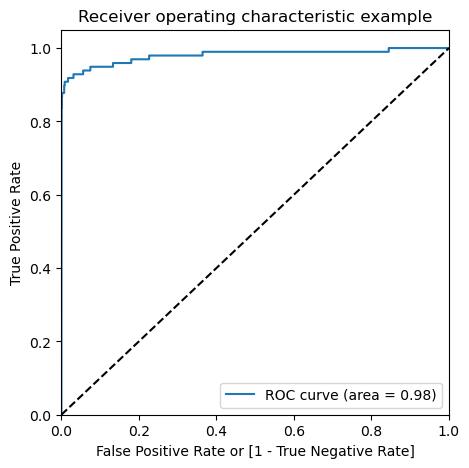

In [70]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

draw_roc(y_test, y_test_pred_proba)

#### 1.1.4 Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.34%
- Test set
    - ROC score : 98%
    - F1 score: 10.54%

### 1.2 Decision Tree with Random Oversampling

In [71]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [72]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.998840330529231
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### 1.2.1 Decision Tree with optimal hyperparameters

In [73]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### 1.2.2 Model evatuation on train data

In [74]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.42%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



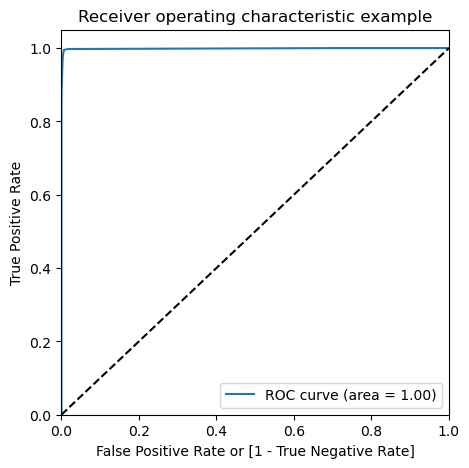

In [75]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]

draw_roc(y_over, y_train_pred_proba)

#### 1.2.3 Predictions on the test set

In [76]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 28.67%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.82      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.64     56962
weighted avg       1.00      0.99      1.00     56962



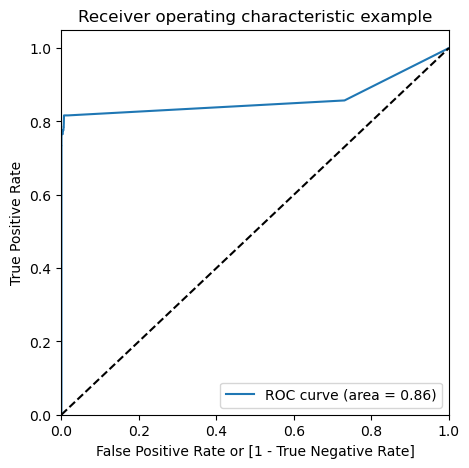

In [77]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

#### 1.2.4 Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.43%
- Test set
    - ROC score : 85%
    - F1 score: 28.83%

### 1.3 XGBoost with Random Oversampling

In [78]:
# creating a KFold object 
folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [79]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.619730,0.374477,0.118336,0.011673,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999859,0.999882,0.999841,0.999861,0.000017,4,0.999865,0.999896,0.999866,0.999875,0.000014
1,4.142158,0.034764,0.131015,0.002173,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999854,0.999831,0.999857,0.999847,0.000012,6,0.999869,0.999860,0.999881,0.999870,0.000008
2,4.042912,0.079065,0.131669,0.002493,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999870,0.999855,0.999853,0.999859,0.000008,5,0.999870,0.999872,0.999874,0.999872,0.000001
3,4.112378,0.017070,0.126336,0.002055,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999978,0.999974,0.999960,0.999971,0.000008,3,0.999996,0.999994,0.999989,0.999993,0.000003
4,4.205139,0.088044,0.128015,0.002166,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999982,0.999974,0.999986,0.999981,0.000005,1,0.999997,0.999994,0.999994,0.999995,0.000002
5,4.193969,0.086352,0.132004,0.001413,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999977,0.999973,0.999981,0.999977,0.000003,2,0.999994,0.999992,0.999990,0.999992,0.000002


In [80]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999807137893537
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [81]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

#### 1.3.1 XGBoost with optimal hyperparameter

In [82]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}


xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### 1.3.2 Model evatuation on train data

In [83]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



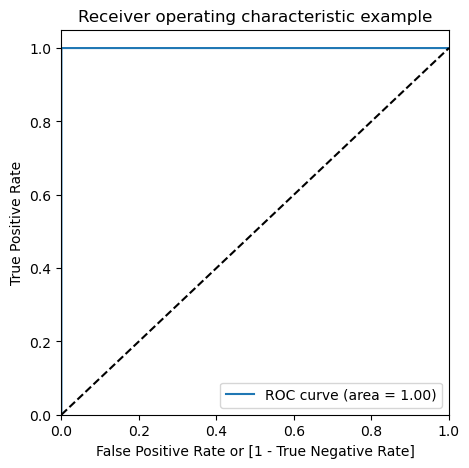

In [84]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

draw_roc(y_over, y_train_pred_proba)

#### 1.3.3 Model evaluation on the test set

In [85]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 89.5%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.83      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



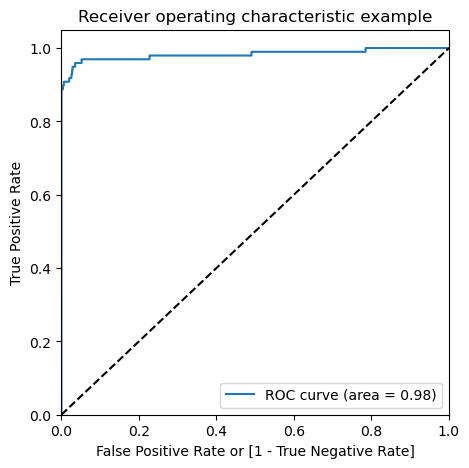

In [86]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

draw_roc(y_test, y_test_pred_proba)

#### 1.3.4 Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 89.01%

## 2. SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE 

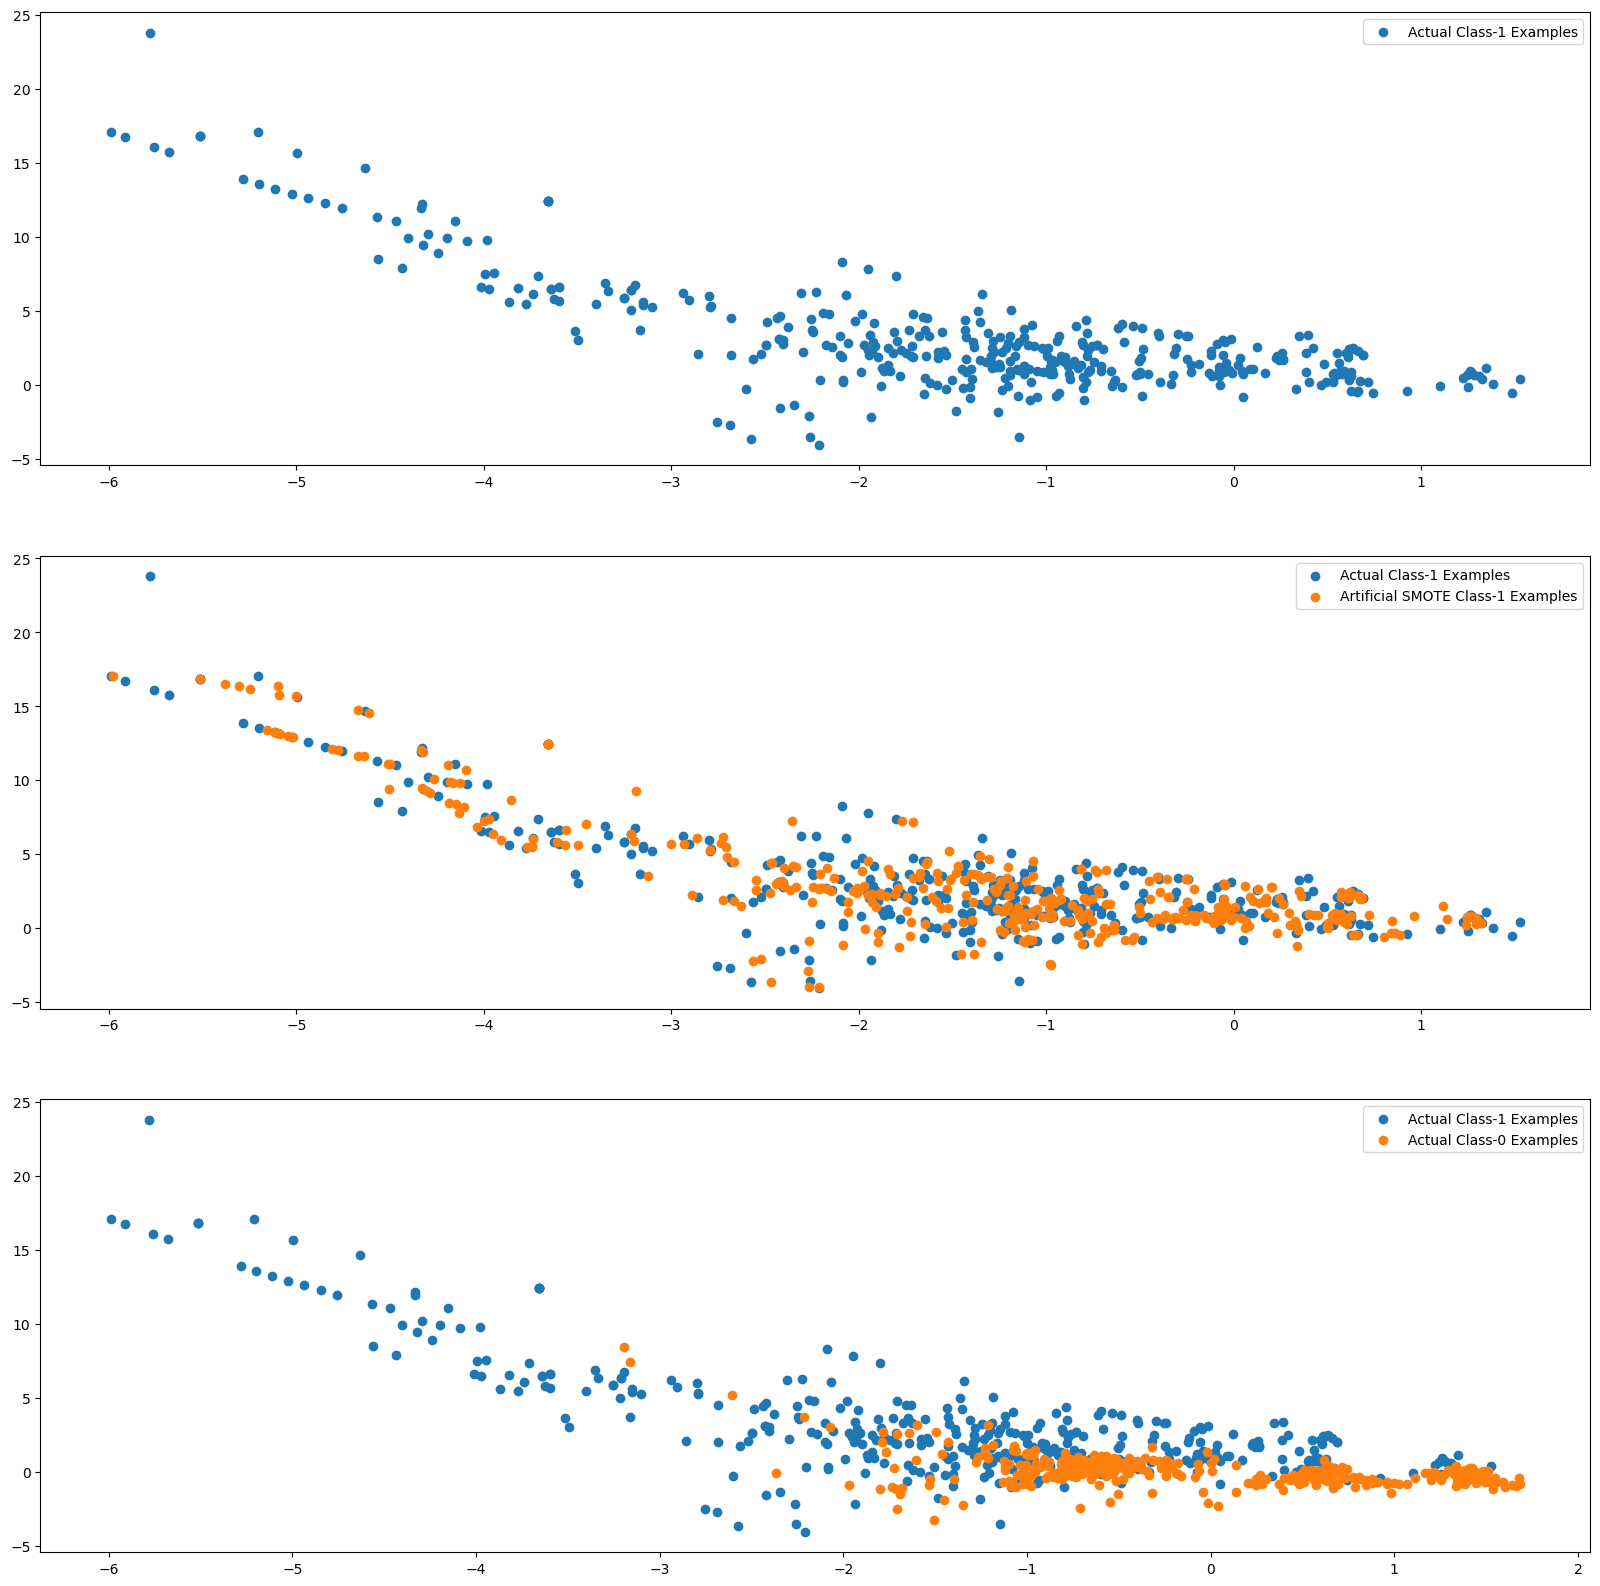

In [109]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 2.1 Logistic Regression on balanced data with SMOTE

In [88]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_smote, y_train_smote)

print('Best ROC AUC score: ', model_cv.best_score_)

print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9889850567288285
Best hyperparameters:  {'C': 1000}


In [89]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.823039,0.049497,0.031402,0.001042,0.01,{'C': 0.01},0.988651,0.989114,0.988999,0.988700,0.988880,0.988869,0.000175,6,0.988979,0.988781,0.988791,0.988910,0.988954,0.988883,0.000082
1,0.884653,0.047816,0.031410,0.001373,0.1,{'C': 0.1},0.988755,0.989218,0.989092,0.988807,0.988990,0.988973,0.000173,5,0.989080,0.988893,0.988891,0.989010,0.989057,0.988986,0.000080
2,0.939173,0.038890,0.031406,0.000784,1,{'C': 1},0.988766,0.989230,0.989103,0.988819,0.989004,0.988984,0.000173,4,0.989090,0.988905,0.988903,0.989021,0.989071,0.988998,0.000080
3,0.954376,0.083767,0.030622,0.001026,10,{'C': 10},0.988767,0.989231,0.989101,0.988820,0.989004,0.988985,0.000173,3,0.989091,0.988906,0.988902,0.989022,0.989071,0.988998,0.000080
4,0.905699,0.032272,0.031194,0.000378,100,{'C': 100},0.988767,0.989231,0.989103,0.988820,0.989004,0.988985,0.000173,2,0.989091,0.988906,0.988904,0.989022,0.989071,0.988999,0.000080
5,0.921271,0.069608,0.031618,0.000488,1000,{'C': 1000},0.988767,0.989231,0.989104,0.988820,0.989004,0.988985,0.000173,1,0.989091,0.988906,0.988904,0.989022,0.989071,0.988999,0.000080


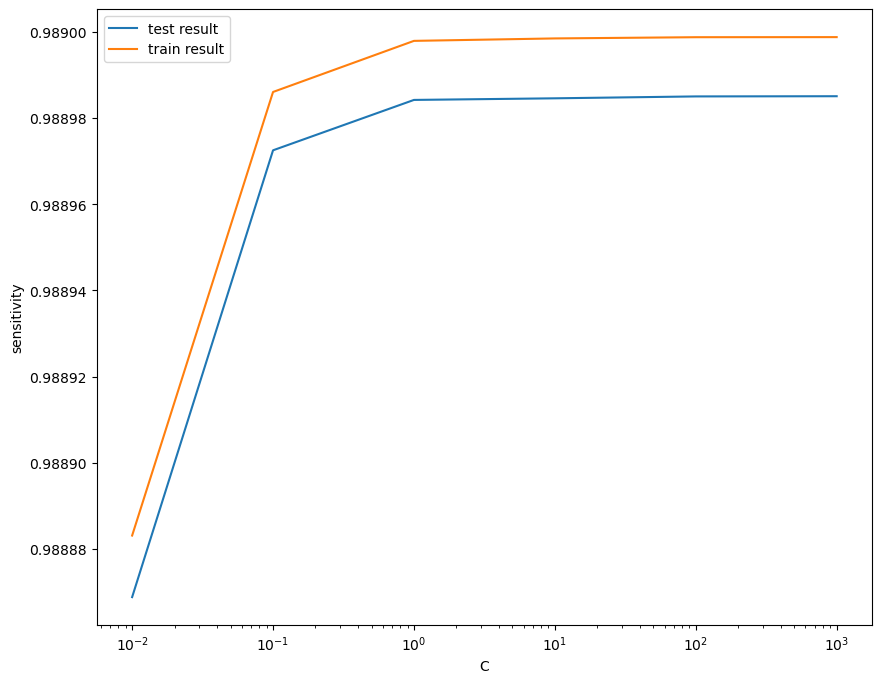

In [90]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### 2.1.1 Logistic Regression with optimal C

In [91]:
# Printing best params
model_cv.best_params_

{'C': 1000}

In [92]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

#### 2.1.2 Evaluating the model on train data

In [93]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.22%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



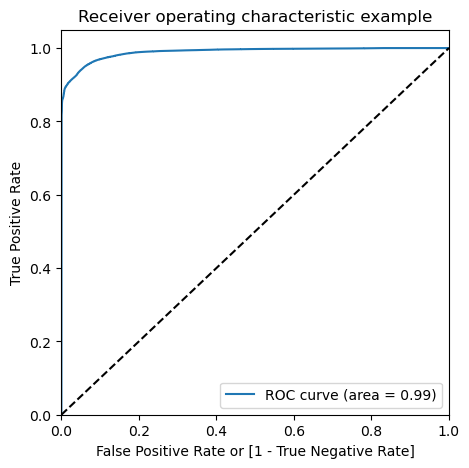

In [94]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### 2.1.3 Evaluating on test data

In [95]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.78%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



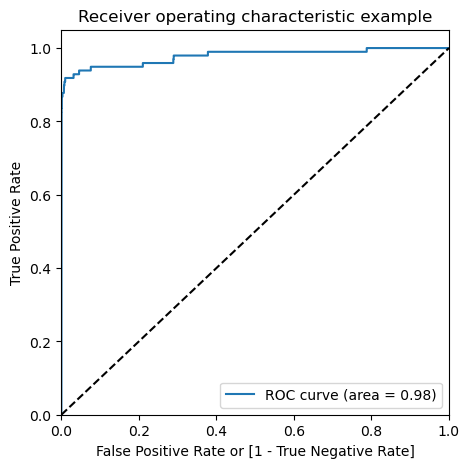

In [96]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba_smote)

#### 2.1.4 Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.23%
- Test set
    - ROC score : 98%
    - F1 score: 9.79%

### 2.2 Decision Tree on balanced data with SMOTE

In [97]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [98]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9976144545633076
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### 2.2.1 Model with optimal hyperparameters

In [99]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [100]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### 2.2.2 Evaluating the model on train data

In [101]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.61%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



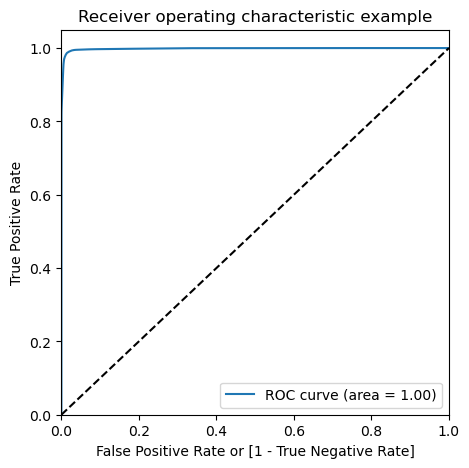

In [102]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba)

#### 2.2.3 Evaluating the model on the test set

In [103]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 15.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



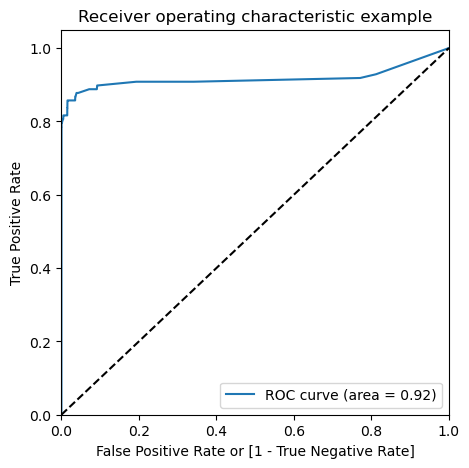

In [104]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_smote)

#### 2.2.4 Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 98.61%
- Test set
    - ROC score : 92%
    - F1 score: 15.62%

### 2.3 XGBoost on balanced data with SMOTE

In [105]:
# creating a KFold object 
folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [106]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.587582,0.075030,0.111015,0.011331,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999511,0.999556,0.999494,0.999520,0.000026,5,0.999570,0.999553,0.999534,0.999552,0.000015
1,4.000968,0.018456,0.126007,0.000819,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999512,0.999544,0.999543,0.999533,0.000015,4,0.999577,0.999548,0.999580,0.999569,0.000014
2,3.978200,0.041283,0.130668,0.005907,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999495,0.999567,0.999483,0.999515,0.000037,6,0.999561,0.999567,0.999531,0.999553,0.000016
3,4.066749,0.017511,0.128668,0.000944,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999907,0.999922,0.999942,0.999924,0.000014,3,0.999962,0.999955,0.999968,0.999962,0.000005
4,4.109794,0.045547,0.129001,0.004965,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999923,0.999930,0.999940,0.999931,0.000007,1,0.999966,0.999959,0.999963,0.999963,0.000003
5,4.118495,0.072685,0.126690,0.000483,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999923,0.999929,0.999936,0.999929,0.000005,2,0.999955,0.999961,0.999963,0.999960,0.000004


In [107]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999310003781012
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### 2.3.1 Model with optimal hyperparameter

In [108]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [111]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### 2.3.2 Evaluating the model on the train data

In [112]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



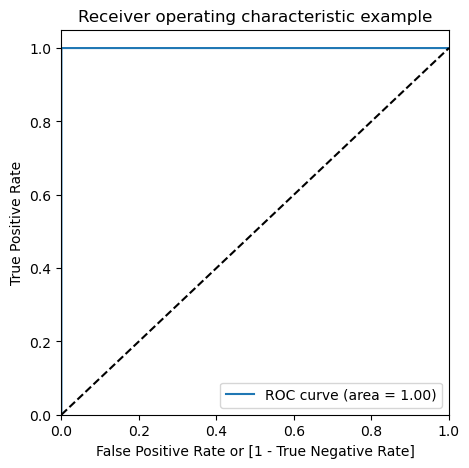

In [113]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba)

#### 2.3.3 Evaluating the model on test data

In [114]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



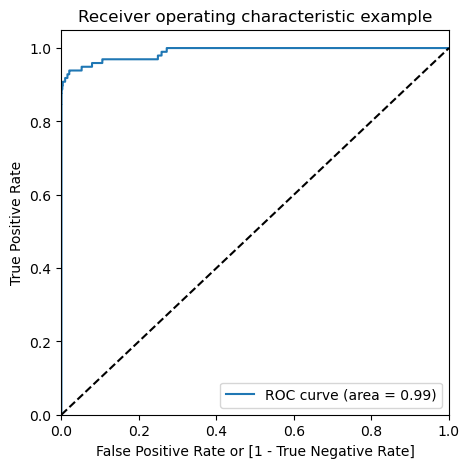

In [115]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

#### 2.3.4 Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 99%
    - F1 score: 80.95%

## 3. ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

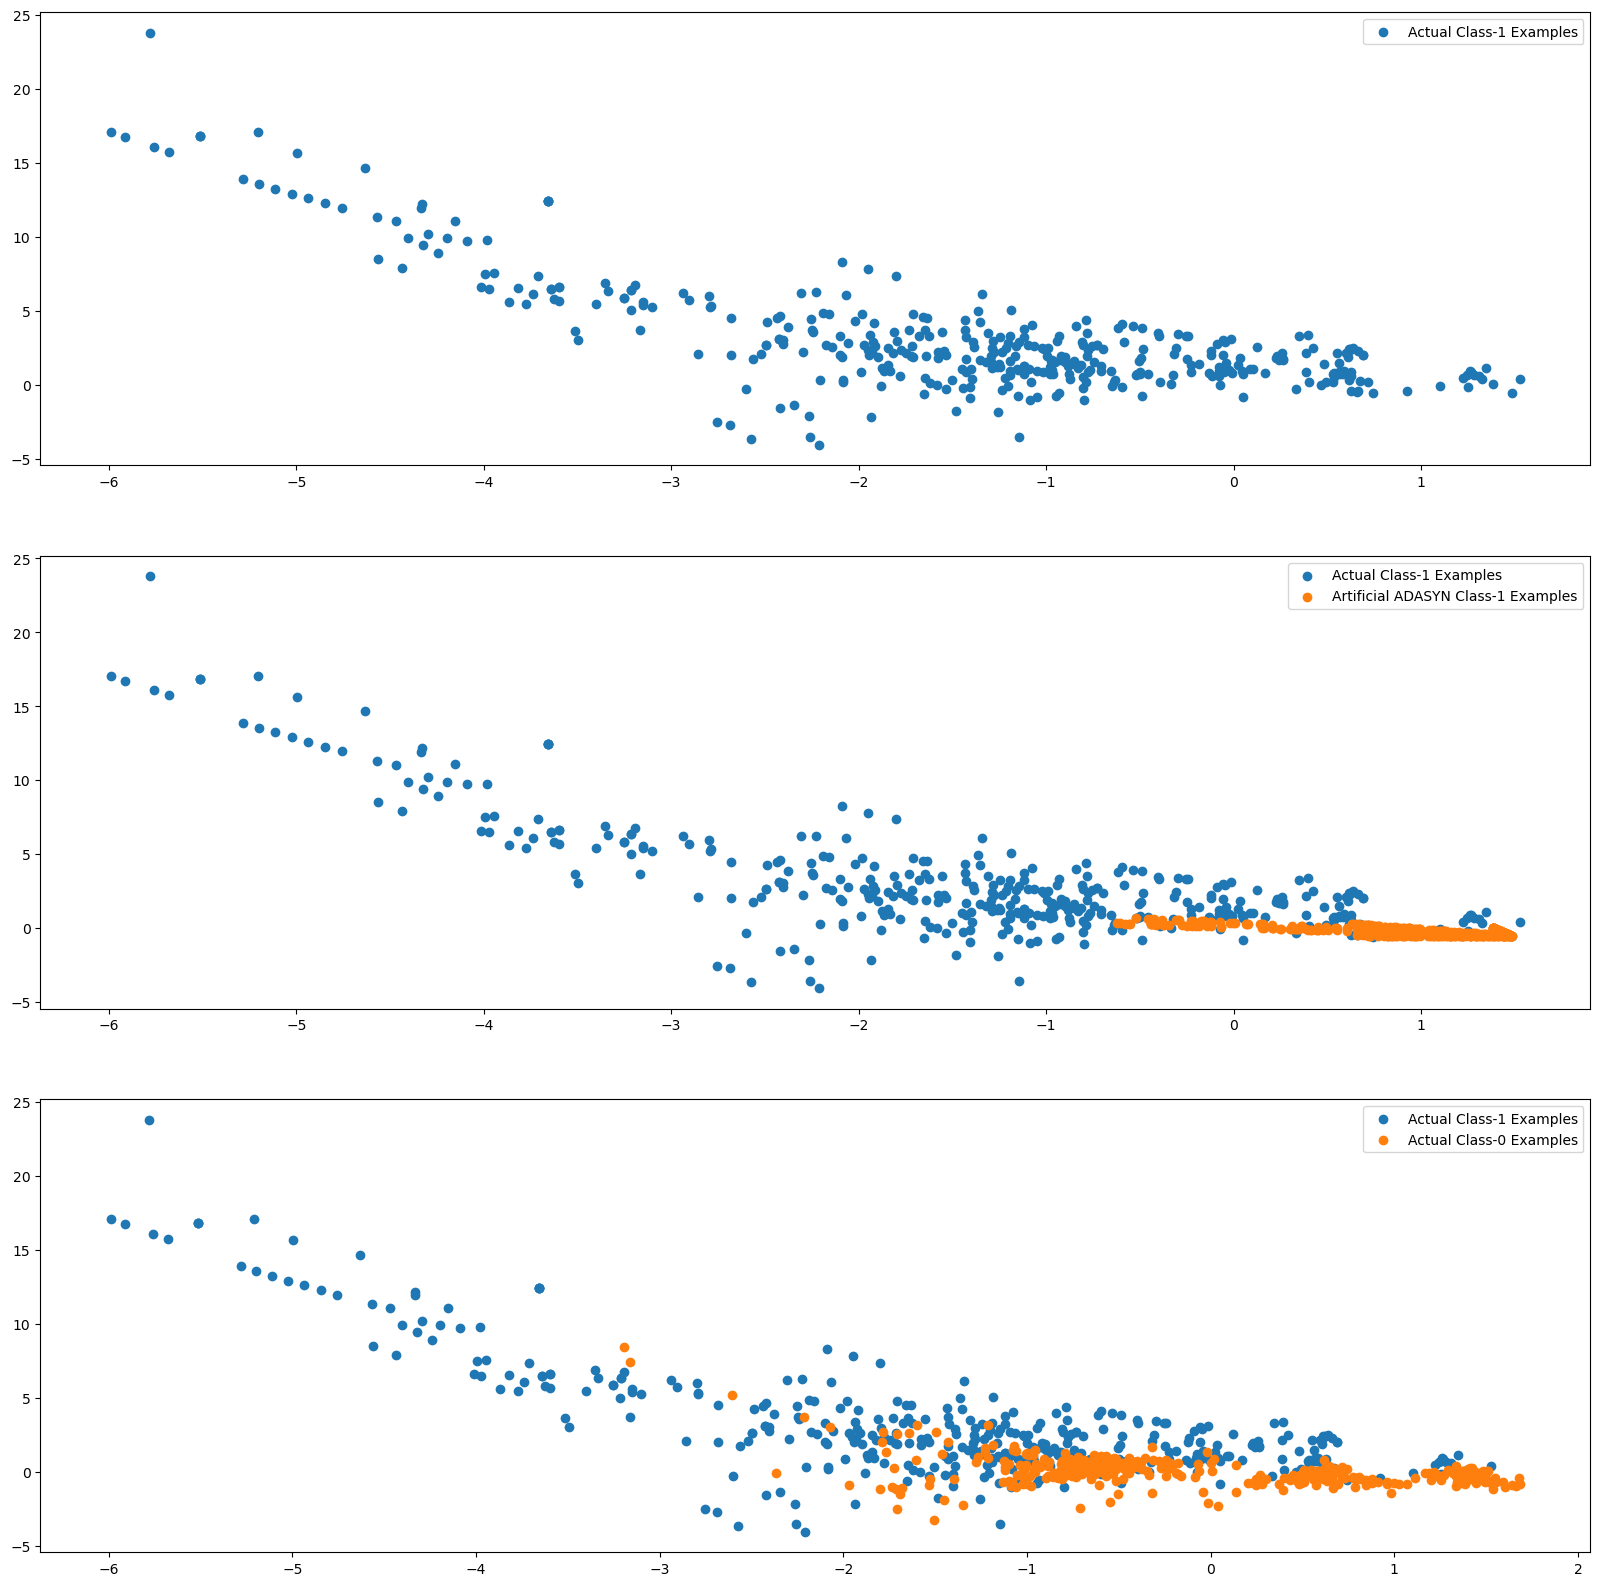

In [116]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 3.1 Logistic Regression on balanced data with ADASYN

In [117]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_adasyn, y_train_adasyn)

print('Best ROC AUC score: ', model_cv.best_score_)

print('Best hyperparameters: ', model_cv.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9616414685446637
Best hyperparameters:  {'C': 1000}


In [118]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.978069,0.289656,0.157940,0.054686,0.01,{'C': 0.01},0.961196,0.961285,0.961634,0.961372,0.000189,6,0.961506,0.961237,0.961431,0.961391,0.000113
1,2.247899,0.419838,0.154422,0.040945,0.1,{'C': 0.1},0.961446,0.961528,0.961888,0.961620,0.000192,5,0.961764,0.961480,0.961678,0.961640,0.000119
2,2.904681,0.283789,0.191327,0.045512,1,{'C': 1},0.961467,0.961546,0.961907,0.961640,0.000192,4,0.961786,0.961498,0.961698,0.961660,0.000120
3,2.297213,0.590251,0.201001,0.058046,10,{'C': 10},0.961469,0.961544,0.961909,0.961641,0.000192,3,0.961788,0.961497,0.961699,0.961661,0.000122
4,1.627026,0.047334,0.115733,0.008161,100,{'C': 100},0.961470,0.961545,0.961909,0.961641,0.000192,2,0.961788,0.961498,0.961700,0.961662,0.000121
5,1.649229,0.092842,0.108348,0.006723,1000,{'C': 1000},0.961470,0.961546,0.961909,0.961641,0.000192,1,0.961788,0.961498,0.961700,0.961662,0.000121


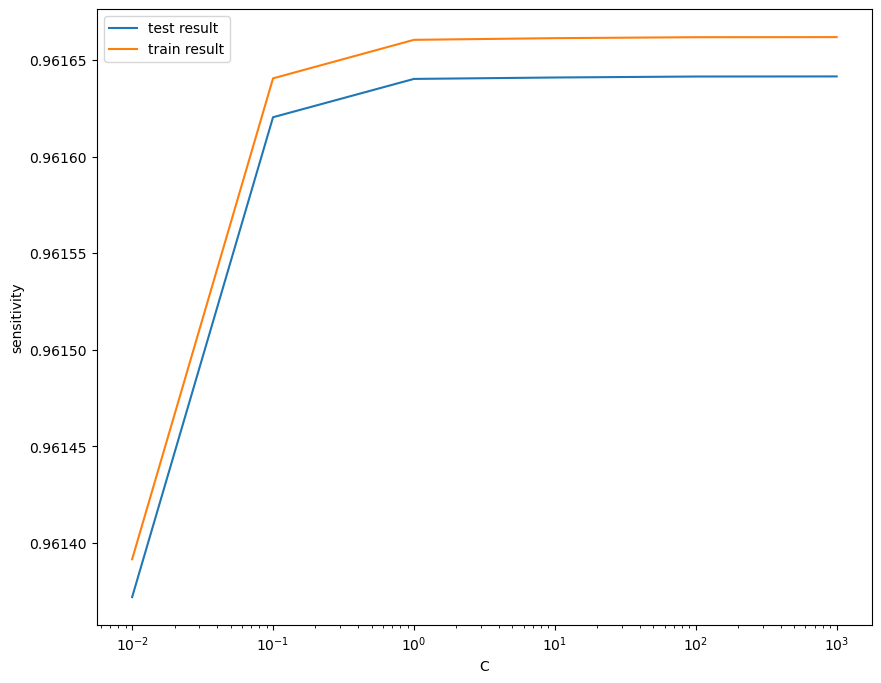

In [119]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### 3.1.1 Logistic Regression with optimal C

In [120]:
model_cv.best_params_

{'C': 1000}

In [121]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### 3.1.2 Evaluating the model with train data

In [122]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 89.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885



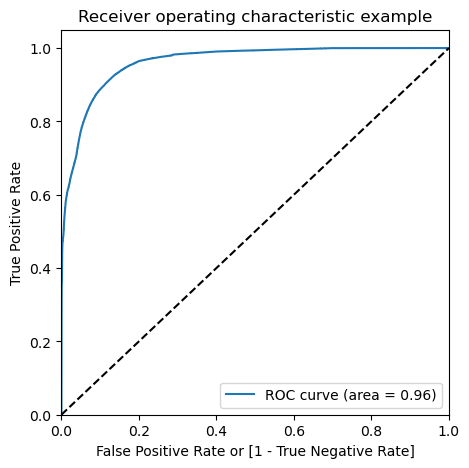

In [123]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn, y_train_pred_proba)

#### 3.1.3 Evaluating on test data

In [124]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



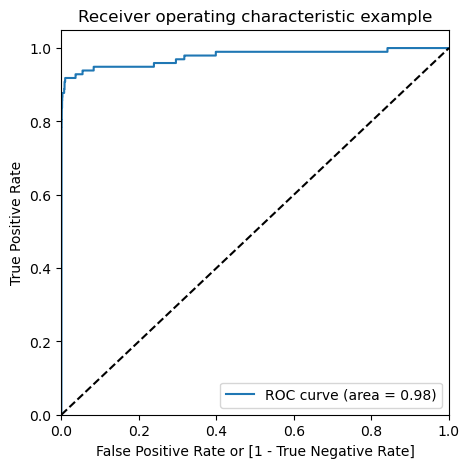

In [125]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

#### 3.1.4 Model Summary
- Train set
    - ROC score : 96%
    - F1 score: 89.2%
- Test set
    - ROC score : 98%
    - F1 score: 3.23%

### 3.2 Decision Tree on balanced data with ADASYN

In [126]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [127]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9444560009030557
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### 3.2.1 Model with optimal hyperparameters

In [128]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### 3.2.2 Evaluating the model on train data

In [129]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.79%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      1.00      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



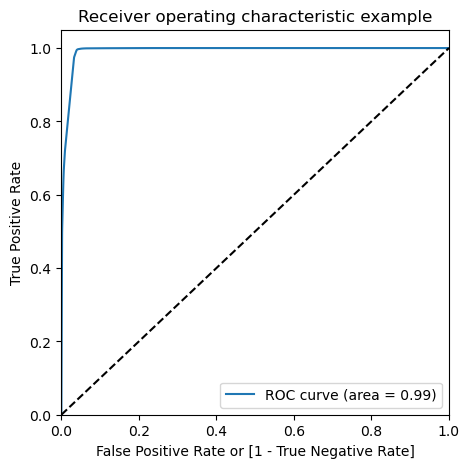

In [130]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn, y_train_pred_proba)

#### 3.2.3 Evaluating the model on the test set

In [131]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.05%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



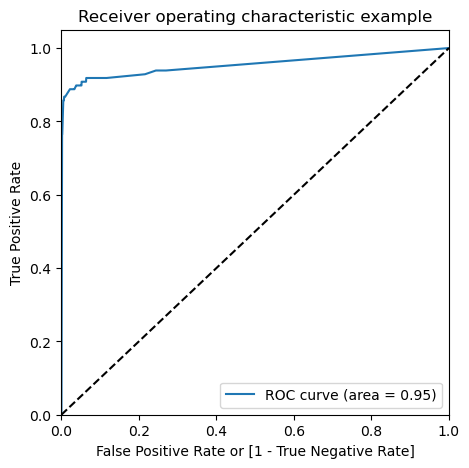

In [132]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

#### 3.2.4 Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 97.79%
- Test set
    - ROC score : 95%
    - F1 score: 7.05%

### 3.3 XGBoost on balanced data with ADASYN

In [133]:
# creating a KFold object 
folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [130]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,68.194719,0.852866,0.777778,0.009585,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.984958,0.968837,0.996349,0.983381,0.011287,4,0.998973,0.999189,0.998847,0.999003,0.000141
1,86.580963,0.528179,0.772746,0.010759,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982246,0.965539,0.996213,0.981333,0.012539,6,0.998978,0.999082,0.998864,0.998975,0.000089
2,93.801857,0.771221,0.781887,0.009009,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982308,0.965918,0.996023,0.981416,0.012307,5,0.998945,0.999170,0.998787,0.998968,0.000157
3,68.297107,0.745979,0.785035,0.007407,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.994385,0.964377,0.998268,0.985676,0.015144,2,0.999931,0.999901,0.999896,0.999909,0.000016
4,86.728386,0.276222,0.779123,0.006699,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.989813,0.961606,0.999055,0.983491,0.015929,3,0.999906,0.999937,0.999913,0.999918,0.000013
5,94.748279,0.652666,0.780073,0.011162,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.992176,0.968188,0.999123,0.986496,0.013253,1,0.999943,0.999917,0.999909,0.999923,0.000015


In [134]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9881000316705739
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### 3.3.1 Model with optimal hyperparameter

In [135]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [136]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### 3.3.2 Evaluating the model on the train data

In [137]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



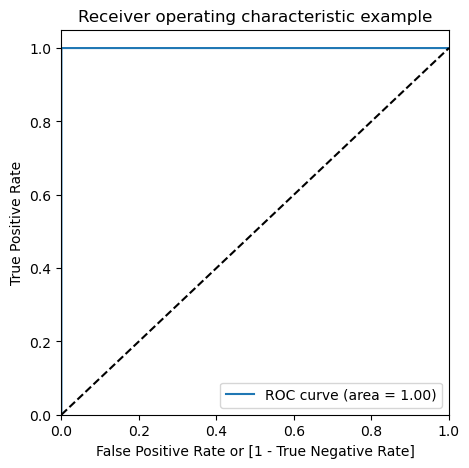

In [138]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### 3.3.3 Evaluating the model on test data

In [139]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



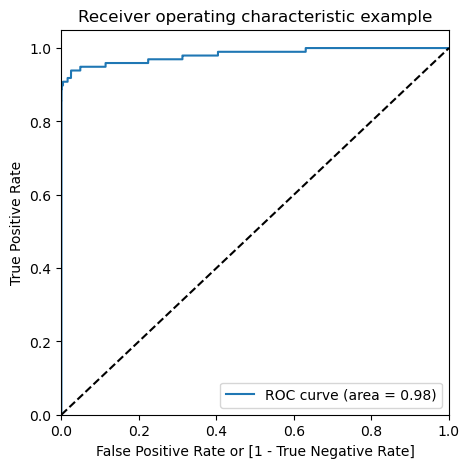

In [140]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### 3.3.4 Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 99%
    - F1 score: 81.16%

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


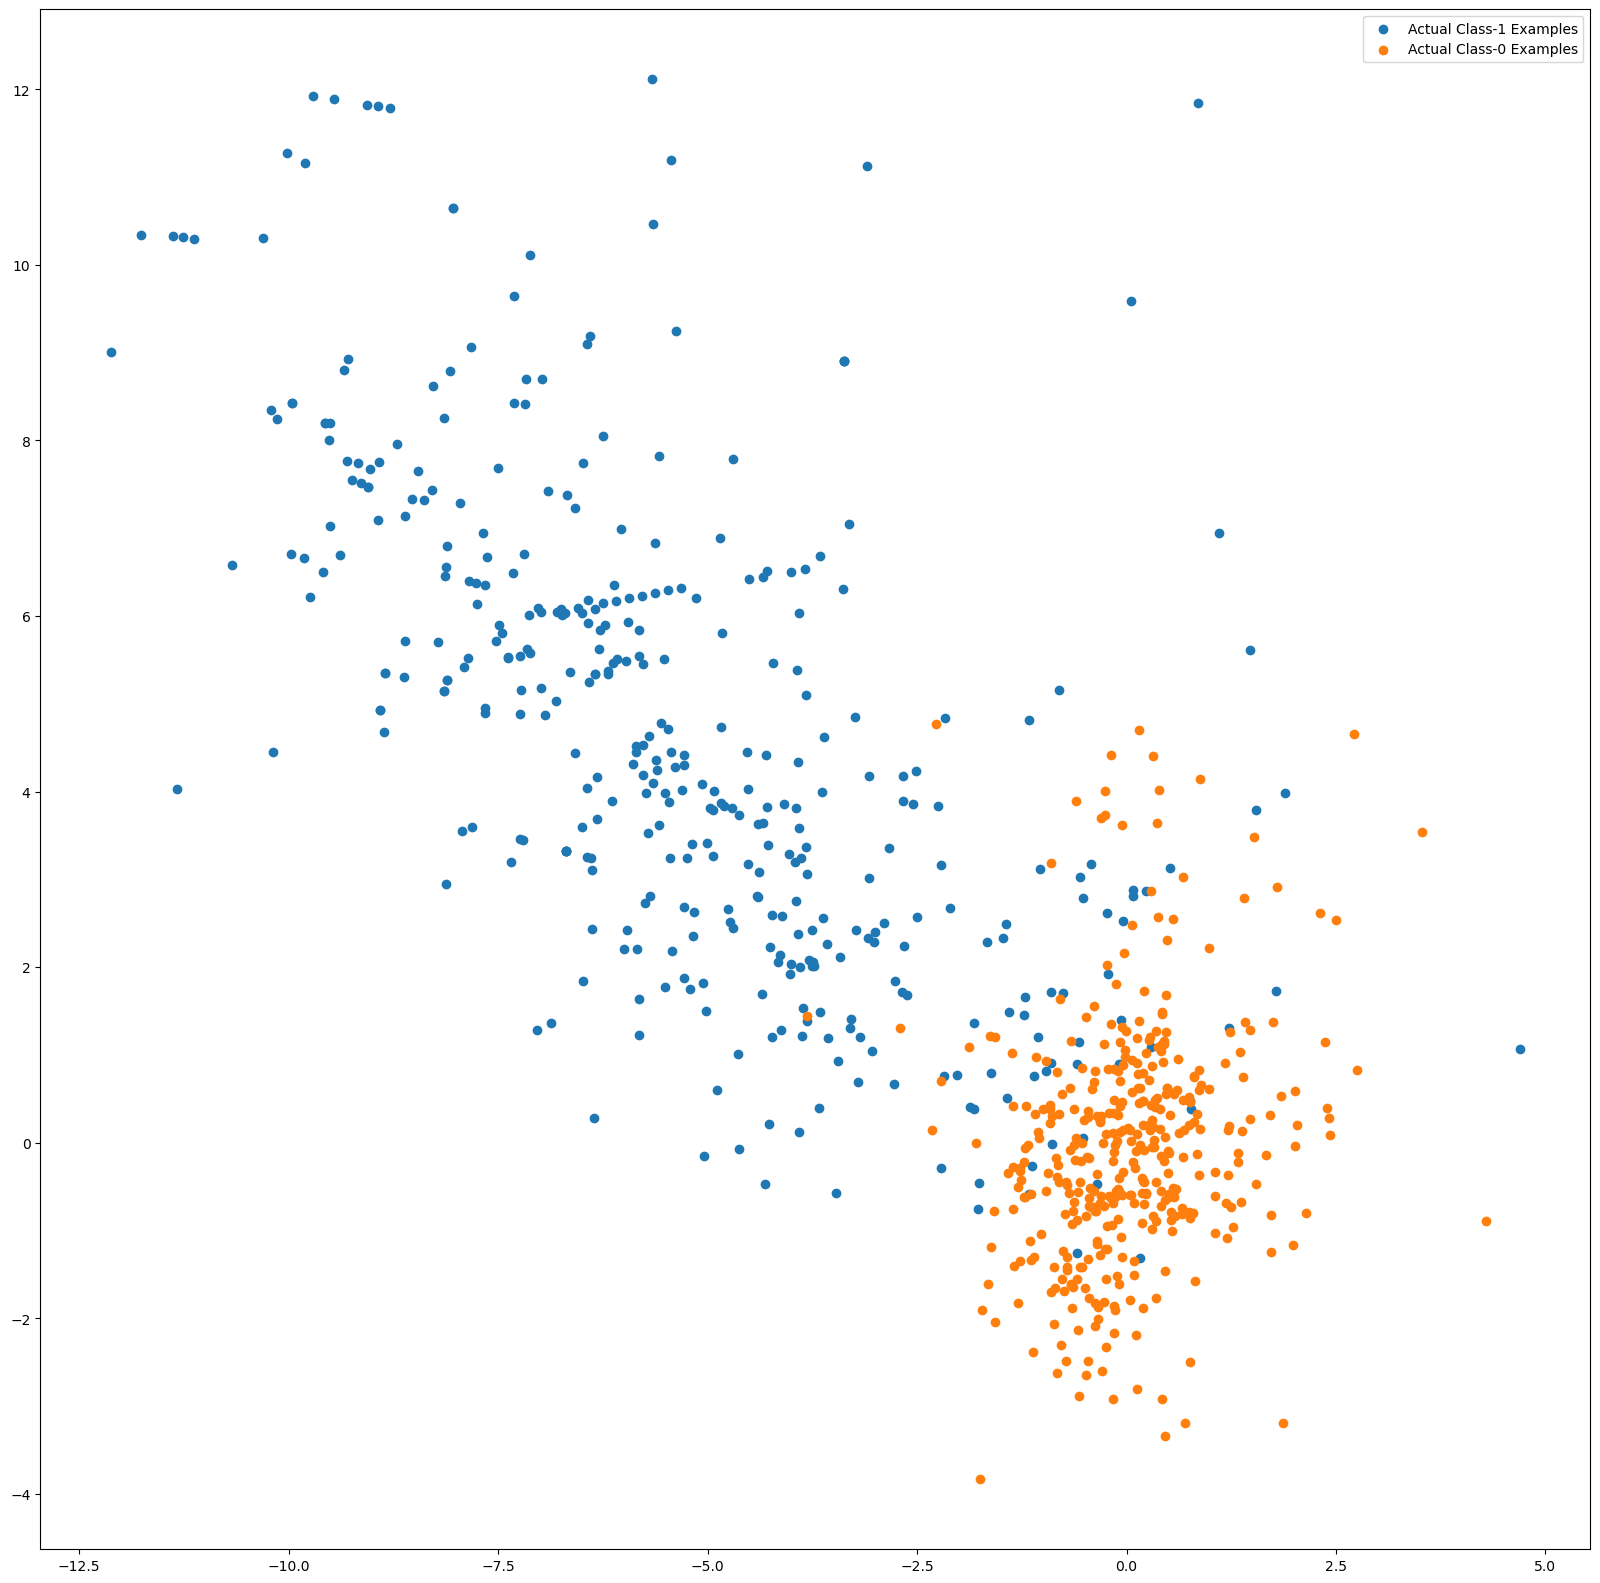

In [141]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [145]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold", threshold)

Train auc = 1.0
Threshold 0.9223263


We have found that 92% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.

# Summary
## Strategic Selection of XGBoost Model for Credit Card Fraud Detection

- In the pursuit of an effective solution to address credit card fraud detection, achieving a high recall rate is the primary objective. Ensuring a high recall is crucial for identifying a significant proportion of actual fraudulent transactions, thereby offering a robust defense mechanism against potential high-value fraudulent activities. 


- Given the severe consequences faced by banking institutions in terms of monetary losses, credibility, and trust due to fraudulent transactions, prioritizing recall is strategically chosen to safeguard both the financial well-being of banks and the interests of their customers.

## Model Evaluation and Selection Process

In the analysis, various machine learning models were systematically experimented with, leveraging the power of the ADASYN (Adaptive Synthetic Sampling) technique to balance the highly imbalanced dataset. Among the models considered, the XGBoost model emerged as a standout performer. The key findings are as follows:

- **ROC Score:** A commendable **ROC score of 99%** was exhibited by the XGBoost model, showcasing its ability to effectively distinguish between positive and negative classes.

- **Recall Rate:** The exceptionally high **Recall rate of 86%** in the balanced dataset stood out as a critical metric, ensuring that a substantial portion of actual fraudulent transactions is correctly identified.

## Rationale for Choosing XGBoost

- Therefore, based on a comprehensive evaluation of performance metrics, the XGBoost model, when coupled with the ADASYN technique on a balanced dataset, is identified as the preferred choice for the credit card fraud detection solution. This strategic decision is grounded in the model's ability to not only deliver an impressive ROC score but, more importantly, to prioritize recall—a critical factor in mitigating the impact of fraudulent transactions on both financial institutions and their client.


- By adopting the **XGBoost model within the framework of ADASYN**, the proactive monitoring and fraud prevention measures implemented by banks are poised to be enhanced, thereby fortifying their defenses against the evolving landscape of credit card fraud.

